# Deep Learning for Automated Corrosion Detection

## Suprvise Prof. Muzammil Behzad

## Bayan Abdullah Aldahlawi 202317310

## ____________________________________________________________________

<p>The Dataset: https://github.com/pjsun2012/Phase5_Capstone-Project</p>

<p>Step 1: Preprocessing & Organize Dataset</p>
<p>Step 2: Train–Validation–Test Split</p>
<p>Step 3: Exploratory Data Analysis (EDA)</p>
<p>Step 4: Build & Train Model (ResNet50, ResNet18, ResNet101)</p>
<p>Step 5: Evaluate</p>

## Step 1: Preprocessing & Organize Dataset

<p>Import the libraries for preprocess data</p>
<p>Make sure to avoid the random result by using Random seed</p>
<p>Download the dataset from GitHub get the path location and load the dataset: https://github.com/pjsun2012/Phase5_Capstone-Project</p>
<p>Note: Some pictures found corrupted, need to handle by removed them</p>
<p>Since the size of dataset become small, need to do augmented dataset to increase the size during traning</p>

In [1]:
# Import Libraries
# File system navigation, creating folders, listing files, copying/moving images
import pathlib
import glob
import os, os.path, shutil
# Data Exploration & Visualization
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from  matplotlib import cm
%matplotlib inline
import pandas as pd
import seaborn as sns
from PIL import Image
# Directory Tree Visualization
from anytree import Node, RenderTree
# Model Evaluation Metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
# Random seed Deep Learning 
import tensorflow as tf

<h3>Avoid Random Results</h3>

In [2]:
# Set random Seeds to avoid random result
SEED = 1
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

<h3>Get The Dataset Path and load it</h3>

In [3]:
# Get Dataset Path
dataset_path = 'C:/Users/Bayan Aldahlawi/Desktop/ICS/ICS 590 - DL/Term Paper/Phase5_Capstone-Project-main/data'

In [4]:
# Check Dataset Content
print("Classes:", os.listdir(dataset_path))

Classes: ['.DS_Store', '._.DS_Store', 'CORROSION', 'NOCORROSION']


In [5]:
# Handle corrupted images by remove them (Do this once on the run time)
'''
folders = [
    'C:/Users/Bayan Aldahlawi/Desktop/ICS/ICS 590 - DL/Term Paper/Phase5_Capstone-Project-main/data/CORROSION',
    'C:/Users/Bayan Aldahlawi/Desktop/ICS/ICS 590 - DL/Term Paper/Phase5_Capstone-Project-main/data/NOCORROSION'
]

for folder in folders:
    print(f"Checking folder: {folder}")
    for filename in os.listdir(folder):
        if filename.startswith("._"):
            file_path = os.path.join(folder, filename)
            size_kb = os.path.getsize(file_path) / 1024
            if size_kb < 10:   # Only remove if the file is smaller than 10 KB
                print(f"Removing small corrupted file: {file_path} ({size_kb:.2f} KB)")
                os.remove(file_path)
            else:
                print(f"Skipped {file_path} ({size_kb:.2f} KB)")
'''

'\nfolders = [\n    \'C:/Users/Bayan Aldahlawi/Desktop/ICS/ICS 590 - DL/Term Paper/Phase5_Capstone-Project-main/data/CORROSION\',\n    \'C:/Users/Bayan Aldahlawi/Desktop/ICS/ICS 590 - DL/Term Paper/Phase5_Capstone-Project-main/data/NOCORROSION\'\n]\n\nfor folder in folders:\n    print(f"Checking folder: {folder}")\n    for filename in os.listdir(folder):\n        if filename.startswith("._"):\n            file_path = os.path.join(folder, filename)\n            size_kb = os.path.getsize(file_path) / 1024\n            if size_kb < 10:   # Only remove if the file is smaller than 10 KB\n                print(f"Removing small corrupted file: {file_path} ({size_kb:.2f} KB)")\n                os.remove(file_path)\n            else:\n                print(f"Skipped {file_path} ({size_kb:.2f} KB)")\n'

<p>The image path</p>
<p>Locations: C:/Users/Bayan Aldahlawi/Desktop/ICS/ICS 590 - DL/Term Paper/Phase5_Capstone-Project-main/data</p>

In [6]:
corrosion_dir = os.path.join(dataset_path, "CORROSION")
nocorrosion_dir = os.path.join(dataset_path, "NOCORROSION")

<p> The number of images in CORROSION and NOCORROSION before handle image issue</p>
<p>There was 1980 CORROSION images</p>
<p>There was 1644 NOCORROSION images</p>

In [7]:
# Check how many images there in CORROSION directory and NOCORROSION directory after handle image issue
corrosion_count = len(os.listdir(corrosion_dir))
nocorrosion_count= len(os.listdir(nocorrosion_dir))
total_images = corrosion_count + nocorrosion_count

print("The number of images in CORROSION and NOCORROSION after handle image issue")
print("There are", corrosion_count, "CORROSION images")
print("There are", nocorrosion_count, "NOCORROSION images")
print("Total number of images:", total_images)

The number of images in CORROSION and NOCORROSION after handle image issue
There are 990 CORROSION images
There are 829 NOCORROSION images
Total number of images: 1819


<h3>Binary Classification: Visualize the Result</h3>

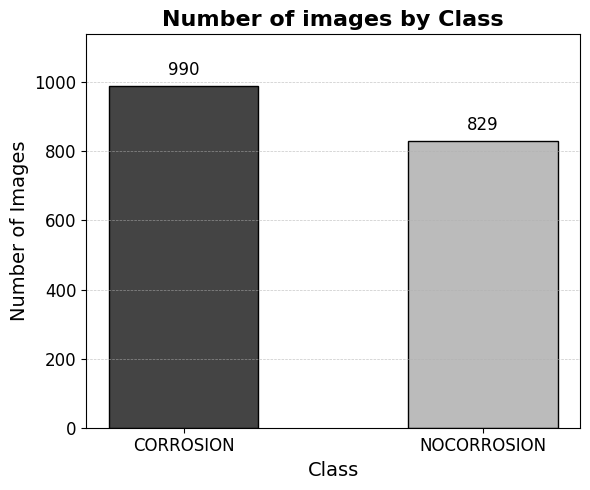

In [8]:
import matplotlib.pyplot as plt

# Data
number_classes = {
    'CORROSION': corrosion_count,
    'NOCORROSION': nocorrosion_count
}

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(
    number_classes.keys(),
    number_classes.values(),
    width=0.5,
    color=['#444444', '#bbbbbb'],
    edgecolor='black'
)

# Add values on top of bars with extra vertical spacing
max_height = max(number_classes.values())
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + (0.02 * max_height),  # dynamic offset
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='medium'
    )

# Labels and Title
plt.title("Number of images by Class", fontsize=16, weight='semibold')
plt.xlabel("Class", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Increase top margin
plt.ylim(0, max_height * 1.15)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

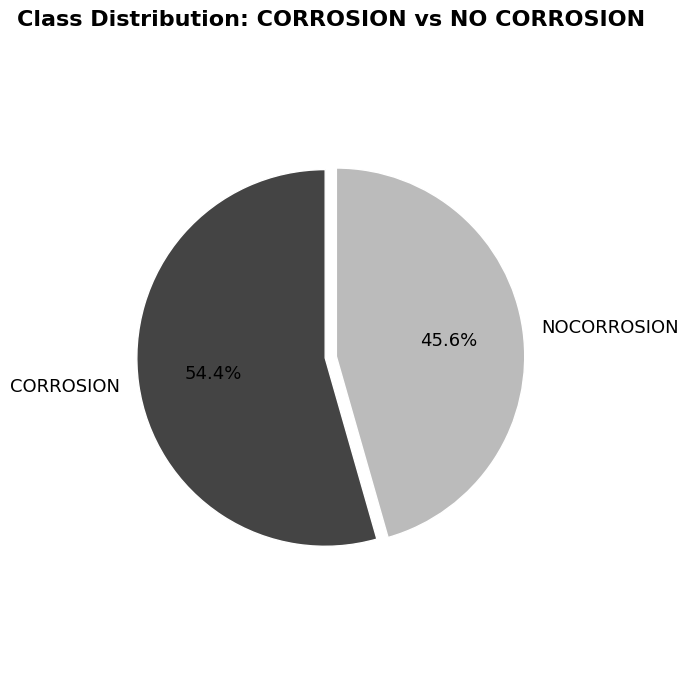

In [9]:
import matplotlib.pyplot as plt

# Assume: number_classes = {'CORROSION': 1234, 'NOCORROSION': 876}
labels = list(number_classes.keys())
sizes = list(number_classes.values())
colors = ['#444444', '#bbbbbb']  # formal grayscale
explode = (0.03, 0.03)

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=False,
    startangle=90,
    colors=colors,
    textprops={'fontsize': 13, 'color': 'black'},
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Class Distribution: CORROSION vs NO CORROSION', fontsize=16, weight='semibold')
plt.axis('equal')  # Equal aspect ratio for perfect circle
plt.tight_layout()
plt.show()


# Step 2: Train–Validation–Test Split

 <p>Create a new folders 'split' and store the split 3 folders train 70%, validation 20%, and test 10%</p>

In [10]:
# Access to the image path
data_CORROSION_dir = 'C:/Users/Bayan Aldahlawi/Desktop/ICS/ICS 590 - DL/Term Paper/Phase5_Capstone-Project-main/data/CORROSION/'
data_NOCORROSION_dir = 'C:/Users/Bayan Aldahlawi/Desktop/ICS/ICS 590 - DL/Term Paper/Phase5_Capstone-Project-main/data/NOCORROSION/'
new_dir = 'split/'

In [11]:
# Create objects that stores all the relevant images
images_CORROSION = [file for file in os.listdir(data_CORROSION_dir) if file.endswith('.jpg')]
images_NOCORROSION = [file for file in os.listdir(data_NOCORROSION_dir) if file.endswith('.jpg')]

In [12]:
# Check the location split directory 
path = 'split'
absolute_path = os.path.abspath(path)

print("Full path:", absolute_path)

Full path: C:\Users\Bayan Aldahlawi\courseDL\DLTermPaper\split


In [13]:
# Creat folders and subfolders to get a hierarchical file structure (Do this once on the run time)
# Create a new folder 'split'
'''
os.mkdir(new_dir)
'''

'\nos.mkdir(new_dir)\n'

In [14]:
# Create a subfolder 'train' under the 'split' (Do this once on the run time)
'''
train_folder = os.path.join(new_dir, 'train')
# Create subfolders 'train_NORMAL' and 'train_PNEUMONIA' under the 'train'
train_CORROSION = os.path.join(train_folder, 'CORROSION')
train_NOCORROSION = os.path.join(train_folder, 'NOCORROSION')
#___________________________________________________________________________
# Create a subfolder 'test' under the 'split'
test_folder = os.path.join(new_dir, 'test')
# Create subfolders 'test_NORMAL' and 'test_PNEUMONIA' under the 'test'
test_CORROSION = os.path.join(test_folder, 'CORROSION')
test_NOCORROSION = os.path.join(test_folder, 'NOCORROSION')
#___________________________________________________________________________
# Create a subfolder 'validation' under the 'split'
val_folder = os.path.join(new_dir, 'validation')
# # Create subfolders 'val_NORMAL' and 'val_PNEUMONIA' under the 'test'
val_CORROSION = os.path.join(val_folder, 'CORROSION')
val_NOCORROSION = os.path.join(val_folder, 'NOCORROSION')
'''

"\ntrain_folder = os.path.join(new_dir, 'train')\n# Create subfolders 'train_NORMAL' and 'train_PNEUMONIA' under the 'train'\ntrain_CORROSION = os.path.join(train_folder, 'CORROSION')\ntrain_NOCORROSION = os.path.join(train_folder, 'NOCORROSION')\n#___________________________________________________________________________\n# Create a subfolder 'test' under the 'split'\ntest_folder = os.path.join(new_dir, 'test')\n# Create subfolders 'test_NORMAL' and 'test_PNEUMONIA' under the 'test'\ntest_CORROSION = os.path.join(test_folder, 'CORROSION')\ntest_NOCORROSION = os.path.join(test_folder, 'NOCORROSION')\n#___________________________________________________________________________\n# Create a subfolder 'validation' under the 'split'\nval_folder = os.path.join(new_dir, 'validation')\n# # Create subfolders 'val_NORMAL' and 'val_PNEUMONIA' under the 'test'\nval_CORROSION = os.path.join(val_folder, 'CORROSION')\nval_NOCORROSION = os.path.join(val_folder, 'NOCORROSION')\n"

In [15]:
#Use all the path strings to make new directories (Do this once on the run time)
'''
os.mkdir(train_folder)
os.mkdir(train_CORROSION)
os.mkdir(train_NOCORROSION)

os.mkdir(test_folder)
os.mkdir(test_CORROSION)
os.mkdir(test_NOCORROSION)

os.mkdir(val_folder)
os.mkdir(val_CORROSION)
os.mkdir(val_NOCORROSION)
'''

'\nos.mkdir(train_folder)\nos.mkdir(train_CORROSION)\nos.mkdir(train_NOCORROSION)\n\nos.mkdir(test_folder)\nos.mkdir(test_CORROSION)\nos.mkdir(test_NOCORROSION)\n\nos.mkdir(val_folder)\nos.mkdir(val_CORROSION)\nos.mkdir(val_NOCORROSION)\n'

In [16]:
# Use a 70%/20%/10% split for train/validation/test (Do this once on the run time)
'''
print('Number of images to train')
print('# train_CORROSION: ', round(len(images_CORROSION)*0.7))
print('# train_NOCORROSION: ', round(len(images_NOCORROSION)*0.7))
print('________________________________________________')
print('Number of images to validation')
print('# val_CORROSION: ', round(len(images_CORROSION)*0.2))
print('# val_NOCORROSION: ', round(len(images_NOCORROSION)*0.2))
print('________________________________________________')
print('Number of images to test')
print('# test_CORROSION: ', round(len(images_CORROSION)*0.1))
print('# test_NOCORROSION: ', round(len(images_NOCORROSION)*0.1))
'''

"\nprint('Number of images to train')\nprint('# train_CORROSION: ', round(len(images_CORROSION)*0.7))\nprint('# train_NOCORROSION: ', round(len(images_NOCORROSION)*0.7))\nprint('________________________________________________')\nprint('Number of images to validation')\nprint('# val_CORROSION: ', round(len(images_CORROSION)*0.2))\nprint('# val_NOCORROSION: ', round(len(images_NOCORROSION)*0.2))\nprint('________________________________________________')\nprint('Number of images to test')\nprint('# test_CORROSION: ', round(len(images_CORROSION)*0.1))\nprint('# test_NOCORROSION: ', round(len(images_NOCORROSION)*0.1))\n"

In [17]:
#train CORROSION (Do this once on the run time)
'''
imgs = images_CORROSION[:693]
for img in imgs:
    origin = os.path.join(data_CORROSION_dir, img)
    destination = os.path.join(train_CORROSION, img)
    shutil.copyfile(origin, destination)
# validation CORROSION
imgs = images_CORROSION[693:891]
for img in imgs:
    origin = os.path.join(data_CORROSION_dir, img)
    destination = os.path.join(val_CORROSION, img)
    shutil.copyfile(origin, destination)
# test CORROSION
imgs = images_CORROSION[891:]
for img in imgs:
    origin = os.path.join(data_CORROSION_dir, img)
    destination = os.path.join(test_CORROSION, img)
    shutil.copyfile(origin, destination)
'''

'\nimgs = images_CORROSION[:693]\nfor img in imgs:\n    origin = os.path.join(data_CORROSION_dir, img)\n    destination = os.path.join(train_CORROSION, img)\n    shutil.copyfile(origin, destination)\n# validation CORROSION\nimgs = images_CORROSION[693:891]\nfor img in imgs:\n    origin = os.path.join(data_CORROSION_dir, img)\n    destination = os.path.join(val_CORROSION, img)\n    shutil.copyfile(origin, destination)\n# test CORROSION\nimgs = images_CORROSION[891:]\nfor img in imgs:\n    origin = os.path.join(data_CORROSION_dir, img)\n    destination = os.path.join(test_CORROSION, img)\n    shutil.copyfile(origin, destination)\n'

In [18]:
# train NOCORROSION (Do this once on the run time)
'''
imgs = images_NOCORROSION
for img in imgs[:580]:
    origin = os.path.join(data_NOCORROSION_dir, img)
    destination = os.path.join(train_NOCORROSION, img)
    shutil.copyfile(origin, destination)
# validation NOCORROSION
imgs = images_NOCORROSION[580:746]
for img in imgs:
    origin = os.path.join(data_NOCORROSION_dir, img)
    destination = os.path.join(val_NOCORROSION, img)
    shutil.copyfile(origin, destination)
# test NOCORROSION
imgs = images_NOCORROSION[746:]
for img in imgs:
    origin = os.path.join(data_NOCORROSION_dir, img)
    destination = os.path.join(test_NOCORROSION, img)
    shutil.copyfile(origin, destination)
'''

'\nimgs = images_NOCORROSION\nfor img in imgs[:580]:\n    origin = os.path.join(data_NOCORROSION_dir, img)\n    destination = os.path.join(train_NOCORROSION, img)\n    shutil.copyfile(origin, destination)\n# validation NOCORROSION\nimgs = images_NOCORROSION[580:746]\nfor img in imgs:\n    origin = os.path.join(data_NOCORROSION_dir, img)\n    destination = os.path.join(val_NOCORROSION, img)\n    shutil.copyfile(origin, destination)\n# test NOCORROSION\nimgs = images_NOCORROSION[746:]\nfor img in imgs:\n    origin = os.path.join(data_NOCORROSION_dir, img)\n    destination = os.path.join(test_NOCORROSION, img)\n    shutil.copyfile(origin, destination)\n'

# Step 3: Exploratory Data Analysis (EDA)

<p>This is the view and understand the data<p>

<h3>Dataset Folder Structure</h3>

In [19]:
# Root directory
root = Node("📁 split")

# Dataset splits
train = Node("📁 train", parent=root)
val = Node("📁 validation", parent=root)
test = Node("📁 test", parent=root)

# === Train folders and images ===
corrosion_train = Node("📂 CORROSION", parent=train)
nocorrosion_train = Node("📂 NOCORROSION", parent=train)

Node("🖼️ 0abb431b43.jpg", parent=corrosion_train)
Node("🖼️ 0abcc76491.jpg", parent=corrosion_train)
Node("🖼️ 0a9f7a0eee.jpg", parent=nocorrosion_train)
Node("🖼️ 0ad4db95ec.jpg", parent=nocorrosion_train)

# === Validation folders and images ===
corrosion_val = Node("📂 CORROSION", parent=val)
nocorrosion_val = Node("📂 NOCORROSION", parent=val)

Node("🖼️ aef773005b.jpg", parent=corrosion_val)
Node("🖼️ af914913b5.jpg", parent=corrosion_val)
Node("🖼️ affd761751.jpg", parent=nocorrosion_val)
Node("🖼️ b0b91bf3fb.jpg", parent=nocorrosion_val)

# === Test folders and images ===
corrosion_test = Node("📂 CORROSION", parent=test)
nocorrosion_test = Node("📂 NOCORROSION", parent=test)

Node("🖼️ f4f7dc093b.jpg", parent=corrosion_test)
Node("🖼️ f5c53f3da3.jpg", parent=corrosion_test)
Node("🖼️ e9d0f5261b.jpg", parent=nocorrosion_test)
Node("🖼️ ed9ab0e791.jpg", parent=nocorrosion_test)

# === Render tree structure ===
for pre, fill, node in RenderTree(root):
    print(f"{pre}{node.name}")

📁 split
├── 📁 train
│   ├── 📂 CORROSION
│   │   ├── 🖼️ 0abb431b43.jpg
│   │   └── 🖼️ 0abcc76491.jpg
│   └── 📂 NOCORROSION
│       ├── 🖼️ 0a9f7a0eee.jpg
│       └── 🖼️ 0ad4db95ec.jpg
├── 📁 validation
│   ├── 📂 CORROSION
│   │   ├── 🖼️ aef773005b.jpg
│   │   └── 🖼️ af914913b5.jpg
│   └── 📂 NOCORROSION
│       ├── 🖼️ affd761751.jpg
│       └── 🖼️ b0b91bf3fb.jpg
└── 📁 test
    ├── 📂 CORROSION
    │   ├── 🖼️ f4f7dc093b.jpg
    │   └── 🖼️ f5c53f3da3.jpg
    └── 📂 NOCORROSION
        ├── 🖼️ e9d0f5261b.jpg
        └── 🖼️ ed9ab0e791.jpg


In [20]:
train_dir = 'split/train'
train_CORROSION_dir = 'split/train/CORROSION/'
train_NOCORROSION_dir = 'split/train/NOCORROSION/'

validation_dir = 'split/validation'
validation_CORROSION_dir = 'split/validation/CORROSION/'
validation_NOCORROSION_dir = 'split/validation/NOCORROSION/'

test_dir = 'split/test'
test_CORROSION_dir = 'split/test/CORROSION/'
test_NOCORROSION_dir = 'split/test/NOCORROSION/'

In [21]:
def num_files_in_direcotry(path):
    num = len([file for file in os.listdir(path) if file.endswith('.jpg')])
    return num

In [22]:
train_CORROSION_num = num_files_in_direcotry(train_CORROSION_dir)
train_NOCORROSION_num = num_files_in_direcotry(train_NOCORROSION_dir)
train_SUM_num = train_CORROSION_num + train_NOCORROSION_num

print("[Train] Number of CORROSION Images: ", train_CORROSION_num)
print("[Train] Number of NOCORROSION Images: ", train_NOCORROSION_num)
print("[Train] Number of TOTAL Images: ", train_SUM_num)

[Train] Number of CORROSION Images:  693
[Train] Number of NOCORROSION Images:  580
[Train] Number of TOTAL Images:  1273


In [23]:
val_CORROSION_num = num_files_in_direcotry(validation_CORROSION_dir)
val_NOCORROSION_num = num_files_in_direcotry(validation_NOCORROSION_dir)
val_SUM_num = val_CORROSION_num + val_NOCORROSION_num

print("[Validation] Number of CORROSION Images: ", val_CORROSION_num)
print("[Validation] Number of NOCORROSION Images: ", val_NOCORROSION_num)
print("[Validation] Number of TOTAL Images: ", val_SUM_num)

[Validation] Number of CORROSION Images:  198
[Validation] Number of NOCORROSION Images:  166
[Validation] Number of TOTAL Images:  364


In [24]:
test_CORROSION_num = num_files_in_direcotry(test_CORROSION_dir)
test_NOCORROSION_num = num_files_in_direcotry(test_NOCORROSION_dir)
test_SUM_num = test_CORROSION_num + test_NOCORROSION_num

print("[test] Number of CORROSION Images: ", test_CORROSION_num)
print("[test] Number of NOCORROSION Images: ", test_NOCORROSION_num)
print("[test] Number of TOTAL Images: ", test_SUM_num)

[test] Number of CORROSION Images:  99
[test] Number of NOCORROSION Images:  83
[test] Number of TOTAL Images:  182


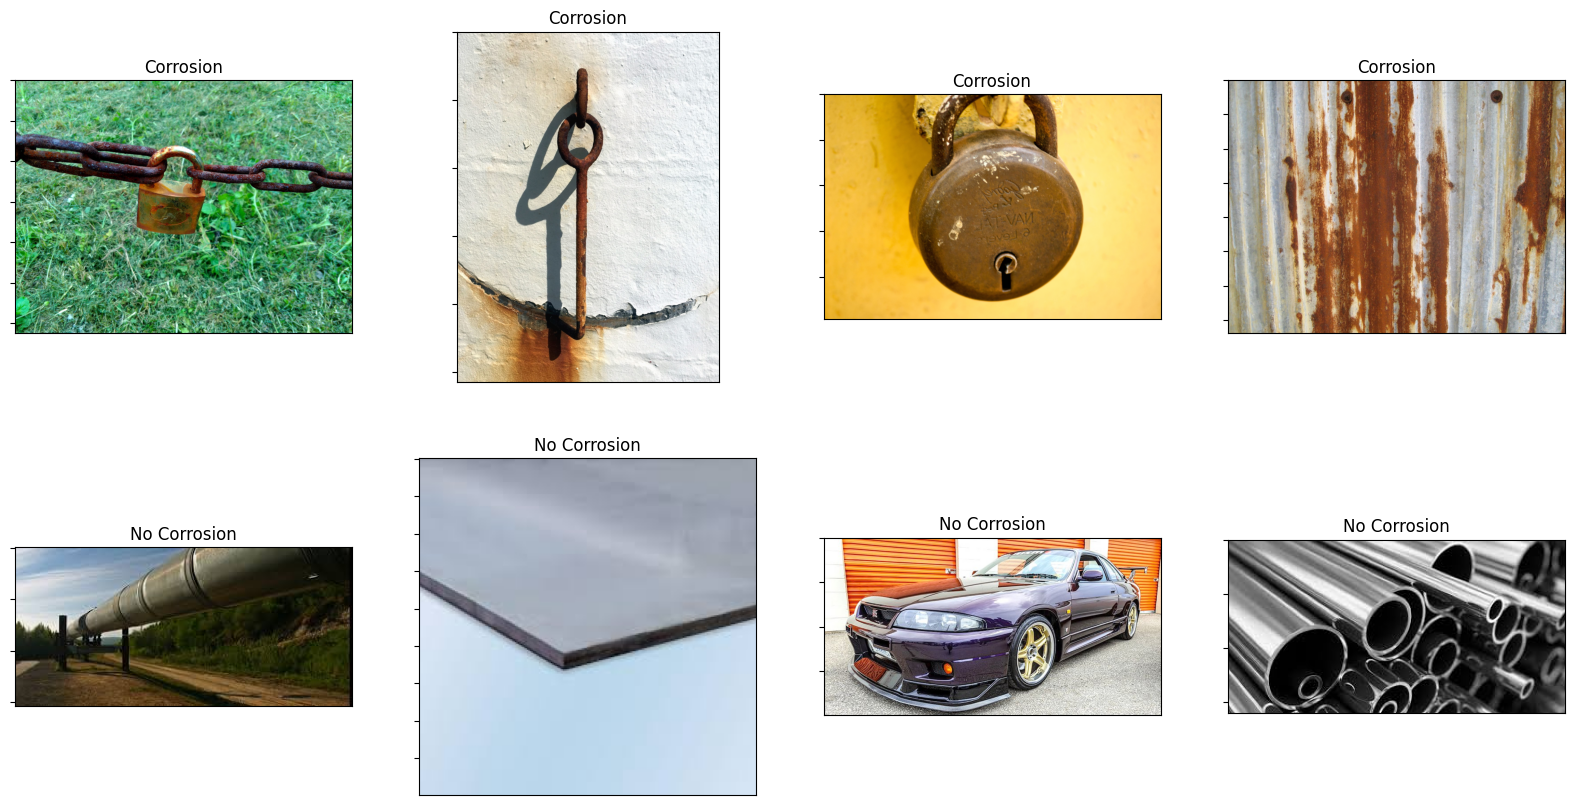

In [25]:
# Plot CORROSION and NOCORROSION in new training dataset
plt.figure(figsize = (20,10))
num_imgs_1 = 4
for index in range(num_imgs_1):
    train_corrosion_pic_name = os.listdir(train_CORROSION_dir)[index]
    train_corrosion_pic_address = train_CORROSION_dir + train_corrosion_pic_name
#    fig, ax_list = plt.sunplots(nrows = 2, ncols =4)
    plt.subplot(2, num_imgs_1, index + 1)
    plt.imshow(Image.open(train_corrosion_pic_address))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    plt.title('Corrosion')

    train_nocorrosion_pic_name = os.listdir(train_NOCORROSION_dir)[index]
    train_nocorrosion_pic_address = train_NOCORROSION_dir + train_nocorrosion_pic_name

    plt.subplot(2, num_imgs_1, index + num_imgs_1 + 1)
    plt.imshow(Image.open(train_nocorrosion_pic_address))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    plt.title('No Corrosion')

In [26]:
# Check traning dataset images sizes
num_imgs_2 = 15
for index in range(num_imgs_2):
    train_corrosion_pic_name = os.listdir(train_CORROSION_dir)[index]
    train_corrosion_pic_address = train_CORROSION_dir + train_corrosion_pic_name
    train_corrosion_image = Image.open(train_corrosion_pic_address)
    train_corrosion_width, train_corrosion_height = train_corrosion_image.size
    print('train_CORROSION_image', index + 1, ":" , train_corrosion_width, 'x', train_corrosion_height)

    train_nocorrosion_pic_name = os.listdir(train_NOCORROSION_dir)[index]
    train_nocorrosion_pic_address = train_NOCORROSION_dir + train_nocorrosion_pic_name
    train_nocorrosion_image = Image.open(train_nocorrosion_pic_address)
    train_nocorrosion_width, train_nocorrosion_height = train_nocorrosion_image.size
    print('train_NOCORROSION_image', index + 1, ":" , train_nocorrosion_width, 'x', train_nocorrosion_height)
    print('\n')

# All images are in different sizes (need to uniform all images into one size) 

train_CORROSION_image 1 : 4160 x 3120
train_NOCORROSION_image 1 : 328 x 154


train_CORROSION_image 2 : 1926 x 2574
train_NOCORROSION_image 2 : 225 x 225


train_CORROSION_image 3 : 3693 x 2462
train_NOCORROSION_image 3 : 760 x 400


train_CORROSION_image 4 : 2462 x 1846
train_NOCORROSION_image 4 : 313 x 161


train_CORROSION_image 5 : 2462 x 1846
train_NOCORROSION_image 5 : 960 x 540


train_CORROSION_image 6 : 4924 x 3283
train_NOCORROSION_image 6 : 1300 x 866


train_CORROSION_image 7 : 4604 x 3041
train_NOCORROSION_image 7 : 225 x 225


train_CORROSION_image 8 : 5820 x 3880
train_NOCORROSION_image 8 : 290 x 174


train_CORROSION_image 9 : 4190 x 3142
train_NOCORROSION_image 9 : 194 x 259


train_CORROSION_image 10 : 5820 x 3880
train_NOCORROSION_image 10 : 1200 x 800


train_CORROSION_image 11 : 5820 x 3880
train_NOCORROSION_image 11 : 1024 x 682


train_CORROSION_image 12 : 5524 x 3755
train_NOCORROSION_image 12 : 469 x 268


train_CORROSION_image 13 : 5820 x 3880
train_NOCORROSIO

## Model Evaluation Chart Function for Results Visualization

<h4>The summary result will include:</h4>

<table>
  <thead>
    <tr>
      <th>Section</th>
      <th>What It Shows or Calculates</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>Plot 1: Loss Curve</strong></td>
      <td>Training vs. validation loss over epochs</td>
    </tr>
    <tr>
      <td><strong>Plot 2: AUC Curve</strong></td>
      <td>Training vs. validation AUC over epochs</td>
    </tr>
    <tr>
      <td><strong>Plot 3: Confusion Matrix</strong></td>
      <td>Shows TP, FP, TN, FN, and percentages per class</td>
    </tr>
    <tr>
      <td><strong>Plot 4: ROC Curve</strong></td>
      <td>Plots ROC and computes AUC score</td>
    </tr>
    <tr>
      <td><strong>Summary Statistics</strong></td>
      <td>Prints accuracy, precision, recall, specificity, and F1 score based on the test predictions</td>
    </tr>
  </tbody>
</table>


In [27]:
def create_charts(cnn, cnn_model):
    """
    plot1: train & validation loss curves
    plot2: train & validation accuracy (AUC) curves
    plot3: confusion matrix
    plot4: train & validation ROC curve and AUC score
    Summary Statistics
    """

    # === Set Global White Theme ===
    sns.set_style("white")
    plt.rcParams["axes.facecolor"] = "white"
    plt.rcParams["figure.facecolor"] = "white"
    plt.rcParams["grid.color"] = "white"

    # === History ===
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    train_auc = cnn_model.history.get('accuracy') or cnn_model.history.get('acc')
    val_auc = cnn_model.history.get('val_accuracy') or cnn_model.history.get('val_acc')

    # === Predictions ===
    y_true = test_generator.classes
    Y_pred = cnn.predict(test_generator, steps=len(test_generator))
    y_pred = (Y_pred > 0.5).T[0]
    y_pred_prob = Y_pred.T[0]

    # === Create Figure ===
    fig = plt.figure(figsize=(13, 10))
    
    # === Plot 1: Training vs. Validation Loss ===
    plt.subplot(2, 2, 1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    plt.grid(False)

    # === Plot 2: Training vs. Validation AUC ===
    plt.subplot(2, 2, 2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='Training AUC')
    plt.plot(val_auc, label='Validation AUC')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    plt.grid(False)

    # === Plot 3: Confusion Matrix ===
    plt.subplot(2, 2, 3)
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    ticklabels = ['CORROSION', 'NOCORROSION']

    sns.set(font_scale=1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', 
                     xticklabels=ticklabels, yticklabels=ticklabels, cbar=False)
    ax.set_facecolor('white')
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14)

    # === Plot 4: ROC Curve ===
    plt.subplot(2, 2, 4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc * 100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    plt.grid(False)

    plt.tight_layout()

    # === Summary Statistics ===
    TP, FN, FP, TN = cm.ravel()
    accuracy = (TP + TN) / np.sum(cm)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1 = 2 * precision * recall / (precision + recall)
    
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(
        accuracy, precision, recall, specificity, f1)
    print(stats_summary)
    
    # Return metrics as dictionary
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": specificity,
        "f1_score": f1
        }

# Step 4: Build & Train Model - ResNet (ResNet50, ResNet18, ResNet101)

<p> Code Reference: https://www.kaggle.com/code/sshikamaru/detecting-glaucoma-with-cnn-resnet-50/notebook </p>

## Import Necessary Libraries

In [28]:
#Deep Learning
import keras
from keras.utils import plot_model 
from keras import backend as K
from keras import metrics
from keras.regularizers import l2,l1
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation
from keras.metrics import AUC
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator, array_to_img, load_img
# For ResNet Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications import ResNet101
#from keras_cv_attention_models.resnet_family import ResNet18
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, GlobalAveragePooling2D
from tensorflow.keras.layers import Reshape, Add
from tensorflow.keras.optimizers import Adam


# Model Evaluation Metrics
from sklearn.metrics import classification_report, auc

## Model Settings

<h4>The model and training configuration includes:</h4>

<table>
  <thead>
    <tr>
      <th>Parameter</th>
      <th>Value</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>Image Size</strong></td>
      <td>128 x 128</td>
      <td>Resize all input images height and width in pixels</td>
    </tr>
    <tr>
      <td><strong>Batch Size</strong></td>
      <td>128</td>
      <td>Number of samples processed before model update</td>
    </tr>
    <tr>
      <td><strong>Dropout</strong></td>
      <td>0.5</td>
      <td>Dropout rate for regularization in dense layers</td>
    </tr>
    <tr>
      <td><strong>Epochs</strong></td>
      <td>100</td>
      <td>Total number of training epochs</td>
    </tr>
     <tr>
      <td><strong>Normalizes images </strong></td>
      <td>preprocess_input</td>
      <td>Converting from RGB to BGR, and subtracts the ImageNet mean pixel values per channel</td>
    </tr>
     <tr>
      <td><strong>Optimizer</strong></td>
      <td>Adam</td>
      <td></td>
    </tr>
           <tr>
      <td><strong>Learning Rate</strong></td>
      <td>1e-4</td>
      <td></td>
    </tr>
     <tr>
      <td><strong>Loss Function</strong></td>
      <td>Modified Focal Loss</td>
      <td></td>
    </tr>
     <tr>
      <td><strong>Class</strong></td>
      <td>['CORROSION', 'NOCORROSION']</td>
      <td>Binary classification target labels</td>
    </tr>
  </tbody>
</table>

<h4>Fully Connected Layers (FC_LAYERS)</h4>

<table>
  <thead>
    <tr>
      <th>Layer</th>
      <th>Number of Neurons</th>
      <th>Activation Function</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Dense Layer 1</td>
      <td>512</td>
      <td>ReLU</td>
    </tr>
    <tr>
      <td>Dropout</td>
      <td>Rate = 0.5</td>
      <td>—</td>
    </tr>
    <tr>
      <td>Dense Layer 2</td>
      <td>256</td>
      <td>ReLU</td>
    </tr>
    <tr>
      <td>Dropout</td>
      <td>Rate = 0.5</td>
      <td>—</td>
    </tr>
  </tbody>
</table>


In [29]:
# === Settings ===
HEIGHT = 128
WIDTH = 128
BATCH_SIZE = 128
FC_LAYERS = [512, 256]
dropout = 0.5
NUM_EPOCHS = 100
class_list = ['CORROSION', 'NOCORROSION']

# === Folder paths ===
TRAIN_DIR = train_dir         
VAL_DIR = validation_dir      
TEST_DIR = test_dir      # for final evaluation after training

# === Data Generators ===
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input, #zero center and scaling
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 1273 images belonging to 2 classes.
Found 364 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


<h4>Data Augmentation Settings</h4>
<ul>
  <li><strong>Normalization:</strong> Applied <code>preprocess_input</code> from Keras to zero-center and scale pixel values using ImageNet statistics.</li>
  <li><strong>Random Rotation:</strong> Up to ±20 degrees.</li>
  <li><strong>Width Shift:</strong> Up to ±10% of the image width.</li>
  <li><strong>Height Shift:</strong> Up to ±10% of the image height.</li>
  <li><strong>Zoom:</strong> Random zoom in/out by up to ±10%.</li>
  <li><strong>Horizontal Flip:</strong> Enabled (random left-right flip).</li>
</ul>


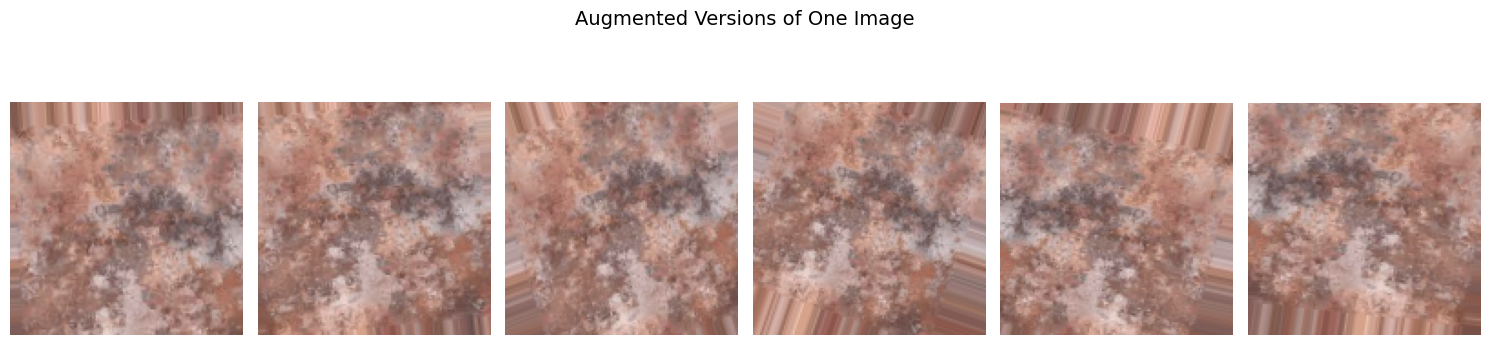

In [30]:
# Example for augument
# === Load and prepare the original image ===
image_path = "C:/Users/Bayan Aldahlawi/Desktop/ICS/ICS 590 - DL/Term Paper/Phase5_Capstone-Project-main/data/CORROSION/35c8fe5c86.jpg"

img = load_img(image_path, target_size=(HEIGHT, WIDTH))  # Resize to match model input
x = img_to_array(img)
x = np.expand_dims(x, axis=0)  # Convert to batch shape
x = preprocess_input(x)  # Preprocess like in your datagen

# === Generate augmentations ===
aug_iter = train_datagen.flow(x, batch_size=1)

# === Plot several augmented images ===
plt.figure(figsize=(15, 4))
for i in range(6):  # Show 6 variations
    augmented_image = next(aug_iter)[0].astype("uint8")
    plt.subplot(1, 6, i+1)
    plt.imshow(augmented_image)
    plt.axis('off')

plt.suptitle("Augmented Versions of One Image", fontsize=14)
plt.tight_layout()
plt.show()

# ResNet50

<h3>Basic</h3>

In [31]:
# Basic: ResNet50 fine-tuning for corrosion detection

# === Build Model ===
def build_model(base_model, dropout, fc_layers):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

base_model_1 = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(HEIGHT, WIDTH, 3)
)

resnet50_model_basic = build_model(base_model_1, dropout, FC_LAYERS)

# === Compile Model ===
optimizer = Adam(learning_rate=1e-4)
resnet50_model_basic.compile(optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Callbacks
checkpoint_path = "./checkpoints/resnet50_model_basic_weights.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor="val_accuracy", save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir="./logs")
callbacks_list = [checkpoint, tensorboard]

# === Summary ===
print(train_generator.class_indices)
resnet50_model_basic.summary()

# === Train Model ===
history_basic_50 = resnet50_model_basic.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks_list,
    shuffle=True
)

{'CORROSION': 0, 'NOCORROSION': 1}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 32, 32, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 32, 32, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 40,497,025 (154.48 MB)

 Trainable params: 16,909,313 (64.50 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

C:\Users\Bayan Aldahlawi\corrosion_env_fixed\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6168 - loss: 1.5486
Epoch 1: val_accuracy improved from -inf to 0.89011, saving model to ./checkpoints/resnet50_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6238 - loss: 1.5147 - val_accuracy: 0.8901 - val_loss: 0.3389
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8268 - loss: 0.6225
Epoch 2: val_accuracy improved from 0.89011 to 0.90659, saving model to ./checkpoints/resnet50_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.8291 - loss: 0.6159 - val_accuracy: 0.9066 - val_loss: 0.3173
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8614 - loss: 0.3853
Epoch 3: val_accuracy did not improve from 0.90659
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8625 - loss: 0.3854 - val_accuracy: 0.9066 - val_loss: 0.3045
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9002 - loss: 0.3443
Epoch 4: val_accuracy improved from 0.90659 to 0.92308, saving model to ./checkpoints/resnet50_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.9014 - loss: 0.3388 - val_accuracy: 0.9231 - val_loss: 0.2712
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9168 - loss: 0.2624
Epoch 5: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9164 - loss: 0.2633 - val_accuracy: 0.9231 - val_loss: 0.2840
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9055 - loss: 0.2541
Epoch 6: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9066 - loss: 0.2523 - val_accuracy: 0.9231 - val_loss: 0.2643
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9166 - loss: 0.2223
Epoch 7: val_accuracy improved from 0.92308 to 0.93132, saving model to ./checkpoints/resnet50_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9174 - loss: 0.2199 - val_accuracy: 0.9313 - val_loss: 0.2638
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9445 - loss: 0.1604
Epoch 8: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9444 - loss: 0.1601 - val_accuracy: 0.9286 - val_loss: 0.2938
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9376 - loss: 0.1830
Epoch 9: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9378 - loss: 0.1819 - val_accuracy: 0.9286 - val_loss: 0.3016
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9517 - loss: 0.1364
Epoch 10: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9508 - loss: 0.1386 - val_accuracy: 0.9231 - val_loss: 0.2862
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9533 - loss: 0.1116
Epoch 11: val_accuracy improved from 0.93132 to 

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9534 - loss: 0.1118 - val_accuracy: 0.9396 - val_loss: 0.2725
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9670 - loss: 0.1185
Epoch 12: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9668 - loss: 0.1195 - val_accuracy: 0.9258 - val_loss: 0.2918
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9575 - loss: 0.1151
Epoch 13: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.9573 - loss: 0.1154 - val_accuracy: 0.9341 - val_loss: 0.2606
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9646 - loss: 0.1453
Epoch 14: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9648 - loss: 0.1436 - val_accuracy: 0.9341 - val_loss: 0.2634
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9665 - loss: 0.0812
Epoch 15: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9817 - loss: 0.0503 - val_accuracy: 0.9423 - val_loss: 0.2985
Epoch 30/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9835 - loss: 0.0445
Epoch 30: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9835 - loss: 0.0445 - val_accuracy: 0.9176 - val_loss: 0.3303
Epoch 31/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9829 - loss: 0.0481
Epoch 31: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9828 - loss: 0.0483 - val_accuracy: 0.9341 - val_loss: 0.2963
Epoch 32/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9815 - loss: 0.0397
Epoch 32: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9813 - loss: 0.0400 - val_accuracy: 0.9231 - val_loss: 0.3407
Epoch 33/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9877 - loss: 0.0370
Epoch 33: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9815 - loss: 0.0484 - val_accuracy: 0.9451 - val_loss: 0.3375
Epoch 43/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9818 - loss: 0.0471
Epoch 43: val_accuracy did not improve from 0.94505
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9818 - loss: 0.0467 - val_accuracy: 0.9341 - val_loss: 0.3413
Epoch 44/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9915 - loss: 0.0349
Epoch 44: val_accuracy did not improve from 0.94505
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9916 - loss: 0.0341 - val_accuracy: 0.9423 - val_loss: 0.3266
Epoch 45/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9792 - loss: 0.0415
Epoch 45: val_accuracy did not improve from 0.94505
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9799 - loss: 0.0405 - val_accuracy: 0.9423 - val_loss: 0.3185
Epoch 46/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9905 - loss: 0.0307
Epoch 46: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9858 - loss: 0.0314 - val_accuracy: 0.9505 - val_loss: 0.2968
Epoch 49/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9913 - loss: 0.0266
Epoch 49: val_accuracy did not improve from 0.95055
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9913 - loss: 0.0265 - val_accuracy: 0.9478 - val_loss: 0.3026
Epoch 50/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9910 - loss: 0.0282
Epoch 50: val_accuracy did not improve from 0.95055
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9910 - loss: 0.0281 - val_accuracy: 0.9423 - val_loss: 0.3114
Epoch 51/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9929 - loss: 0.0312
Epoch 51: val_accuracy did not improve from 0.95055
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9926 - loss: 0.0313 - val_accuracy: 0.9368 - val_loss: 0.3325
Epoch 52/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9944 - loss: 0.0260
Epoch 52: val_accuracy did not improve from 

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
[Summary Statistics]
Accuracy = 94.51% | Precision = 94.95% | Recall = 94.95% | Specificity = 93.98% | F1 Score = 94.95%


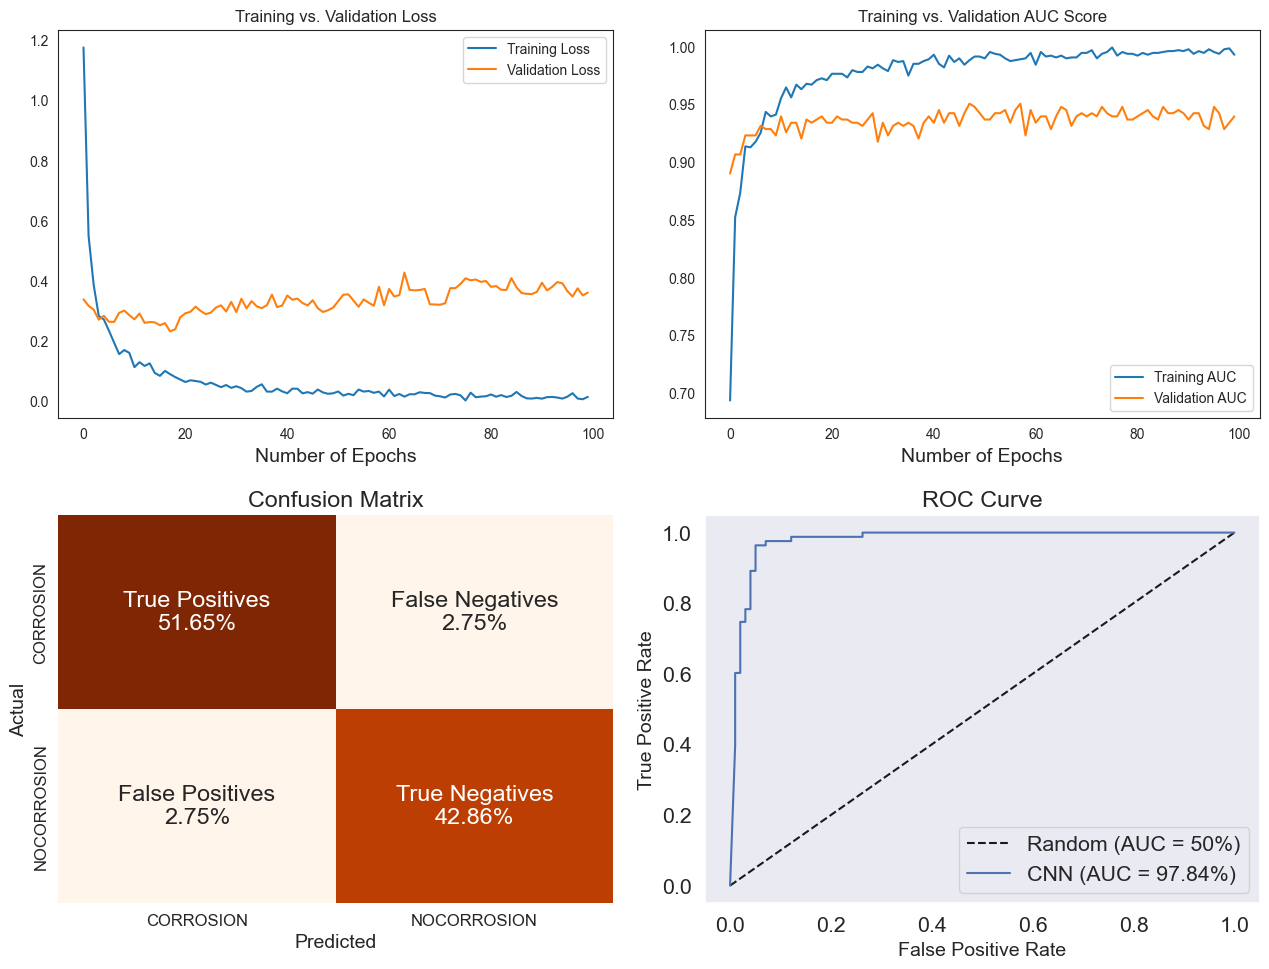

In [32]:
metrics_basic_50 = create_charts(resnet50_model_basic, history_basic_50)

<p>Training loss steadily decreased, while validation loss plateaued around epoch 6, indicating effective learning without significant overfitting. Regularization and learning rate scheduling stabilized performance</p>

In [33]:
# Get predictions
y_true_basic_50 = test_generator.classes
y_pred_probs_basic_50 = resnet50_model_basic.predict(test_generator)
y_pred_basic_50 = (y_pred_probs_basic_50 > 0.5).astype(int)

# Get class names from generator
class_names_basic_50 = list(test_generator.class_indices.keys())

# Print class-wise metrics
report_basic_50 = classification_report(y_true_basic_50, y_pred_basic_50, target_names=class_names_basic_50, digits=4)
print("📊 [Classification Report]")
print(report_basic_50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step
📊 [Classification Report]
              precision    recall  f1-score   support

   CORROSION     0.9495    0.9495    0.9495        99
 NOCORROSION     0.9398    0.9398    0.9398        83

    accuracy                         0.9451       182
   macro avg     0.9446    0.9446    0.9446       182
weighted avg     0.9451    0.9451    0.9451       182



<h3>Model with Modified Focal Loss</h3>

<p>The proposed modified focal loss is defined as:</p>

<p>
\[
\mathcal{L}_{\text{mod-focal}} = \frac{1}{N} \sum_{i=1}^{N} 
\left[ 
w_i \cdot \text{CE}_i \cdot \log\left(1 + \frac{1}{p_{t,i}} \right) 
\right]
\]
</p>

<p>where:</p>

<p>
\[
\text{CE}_i = -y_i \log(\hat{p}_i) - (1 - y_i) \log(1 - \hat{p}_i)
\]
</p>

<p>
\[
w_i = \alpha \cdot y_i \cdot (1 - \hat{p}_i)^\gamma + (1 - \alpha) \cdot (1 - y_i) \cdot \hat{p}_i^\gamma
\]
</p>

<p>
\[
p_{t,i} = 
\begin{cases}
\hat{p}_i & \text{if } y_i = 1 \\
1 - \hat{p}_i & \text{if } y_i = 0
\end{cases}
\]
</p>

<h3>Where:</h3>
<ul>
  <li>\( \hat{p}_i \) is the predicted probability for the positive class</li>
  <li>\( y_i \in \{0, 1\} \) is the ground-truth label</li>
  <li>\( \alpha \in (0,1) \) is the class balancing factor</li>
  <li>\( \gamma \geq 0 \) is the focusing parameter</li>
</ul>


In [34]:
# === Modified Custom Focal Loss ===
def modified_focal_loss(gamma=2.0, alpha=0.5):
    def loss_fn(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1. - tf.keras.backend.epsilon())
        
        # Calculate pt
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        
        # Standard focal loss components
        weight = alpha * y_true * tf.pow(1 - y_pred, gamma) + \
                 (1 - alpha) * (1 - y_true) * tf.pow(y_pred, gamma)
        
        # Modified term: log(1 + 1/pt)
        additional_term = tf.math.log(1 + (1 / pt))
        
        # Combine standard focal loss with modified term
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        loss = weight * cross_entropy * additional_term
        
        return tf.reduce_mean(loss)
    
    return loss_fn
# === Build Model ===
def build_model(base_model, dropout, fc_layers):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))
resnet50_model_focal_eidt = build_model(base_model, dropout, FC_LAYERS)

# === Compile Model ===
optimizer = Adam(learning_rate=1e-4)
resnet50_model_focal_eidt.compile(optimizer, loss=modified_focal_loss(gamma=2.0, alpha=0.5), metrics=["accuracy"])

# === Callbacks ===
checkpoint_path = "./checkpoints/resnet50_model_focal_eidt_weights.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor="val_accuracy", save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir="./logs")
callbacks_list = [checkpoint, tensorboard]

# === Summary ===
print(train_generator.class_indices)
resnet50_model_focal_eidt.summary()

# === Train Model resnet50_model_focal===
history_focal_edit_50 = resnet50_model_focal_eidt.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks_list,
    shuffle=True
)

{'CORROSION': 0, 'NOCORROSION': 1}


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 32, 32, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 32, 32, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 40,497,025 (154.48 MB)

 Trainable params: 16,909,313 (64.50 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5869 - loss: 3.2424
Epoch 1: val_accuracy improved from -inf to 0.84066, saving model to ./checkpoints/resnet50_model_focal_eidt_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5920 - loss: 3.1587 - val_accuracy: 0.8407 - val_loss: 0.1472
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7549 - loss: 1.1389
Epoch 2: val_accuracy improved from 0.84066 to 0.89835, saving model to ./checkpoints/resnet50_model_focal_eidt_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.7556 - loss: 1.1295 - val_accuracy: 0.8984 - val_loss: 0.1438
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8307 - loss: 0.6811
Epoch 3: val_accuracy improved from 0.89835 to 0.90934, saving model to ./checkpoints/resnet50_model_focal_eidt_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8302 - loss: 0.6781 - val_accuracy: 0.9093 - val_loss: 0.1497
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8347 - loss: 0.5165
Epoch 4: val_accuracy did not improve from 0.90934
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8353 - loss: 0.5174 - val_accuracy: 0.9093 - val_loss: 0.1618
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8341 - loss: 0.4253
Epoch 5: val_accuracy did not improve from 0.90934
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8341 - loss: 0.4279 - val_accuracy: 0.8791 - val_loss: 0.1551
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8401 - loss: 0.3615
Epoch 6: val_accuracy did not improve from 0.90934
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8394 - loss: 0.3598 - val_accuracy: 0.9066 - val_loss: 0.0993
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8477 - loss: 0.2110
Epoch 7: val_accuracy improved from 0.90934 to 0.92

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8493 - loss: 0.2103 - val_accuracy: 0.9203 - val_loss: 0.0997
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8921 - loss: 0.1572
Epoch 8: val_accuracy improved from 0.92033 to 0.92308, saving model to ./checkpoints/resnet50_model_focal_eidt_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8914 - loss: 0.1573 - val_accuracy: 0.9231 - val_loss: 0.0926
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8764 - loss: 0.1999
Epoch 9: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8761 - loss: 0.1980 - val_accuracy: 0.9176 - val_loss: 0.0807
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8872 - loss: 0.1094
Epoch 10: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.8876 - loss: 0.1082 - val_accuracy: 0.9093 - val_loss: 0.0941
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8648 - loss: 0.1369
Epoch 11: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8657 - loss: 0.1387 - val_accuracy: 0.9093 - val_loss: 0.0733
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9114 - loss: 0.0822
Epoch 12: val_accuracy did not improve from 0.

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9097 - loss: 0.0466 - val_accuracy: 0.9286 - val_loss: 0.0493
Epoch 21/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9256 - loss: 0.0409
Epoch 21: val_accuracy did not improve from 0.92857
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9251 - loss: 0.0410 - val_accuracy: 0.9231 - val_loss: 0.0477
Epoch 22/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9246 - loss: 0.0299
Epoch 22: val_accuracy did not improve from 0.92857
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9239 - loss: 0.0303 - val_accuracy: 0.9258 - val_loss: 0.0470
Epoch 23/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9255 - loss: 0.0410
Epoch 23: val_accuracy did not improve from 0.92857
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9260 - loss: 0.0407 - val_accuracy: 0.9258 - val_loss: 0.0483
Epoch 24/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9323 - loss: 0.0609
Epoch 24: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9363 - loss: 0.0348 - val_accuracy: 0.9313 - val_loss: 0.0432
Epoch 28/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9234 - loss: 0.0415
Epoch 28: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9230 - loss: 0.0415 - val_accuracy: 0.9231 - val_loss: 0.0406
Epoch 29/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9383 - loss: 0.0266
Epoch 29: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9381 - loss: 0.0270 - val_accuracy: 0.9286 - val_loss: 0.0413
Epoch 30/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9183 - loss: 0.0399
Epoch 30: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9190 - loss: 0.0394 - val_accuracy: 0.9313 - val_loss: 0.0436
Epoch 31/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9331 - loss: 0.0294
Epoch 31: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9466 - loss: 0.0339 - val_accuracy: 0.9341 - val_loss: 0.0514
Epoch 35/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9352 - loss: 0.0256
Epoch 35: val_accuracy did not improve from 0.93407
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9355 - loss: 0.0255 - val_accuracy: 0.9313 - val_loss: 0.0518
Epoch 36/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9546 - loss: 0.0255
Epoch 36: val_accuracy did not improve from 0.93407
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9547 - loss: 0.0253 - val_accuracy: 0.9313 - val_loss: 0.0508
Epoch 37/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9386 - loss: 0.0291
Epoch 37: val_accuracy did not improve from 0.93407
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9385 - loss: 0.0290 - val_accuracy: 0.9341 - val_loss: 0.0522
Epoch 38/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9589 - loss: 0.0246
Epoch 38: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9568 - loss: 0.0237 - val_accuracy: 0.9396 - val_loss: 0.0534
Epoch 40/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9611 - loss: 0.0189
Epoch 40: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9609 - loss: 0.0189 - val_accuracy: 0.9368 - val_loss: 0.0580
Epoch 41/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9507 - loss: 0.0263
Epoch 41: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9509 - loss: 0.0259 - val_accuracy: 0.9313 - val_loss: 0.0647
Epoch 42/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9533 - loss: 0.0199
Epoch 42: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9534 - loss: 0.0202 - val_accuracy: 0.9341 - val_loss: 0.0692
Epoch 43/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9444 - loss: 0.0255
Epoch 43: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9527 - loss: 0.0262 - val_accuracy: 0.9451 - val_loss: 0.0660
Epoch 64/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9720 - loss: 0.0155
Epoch 64: val_accuracy did not improve from 0.94505
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9717 - loss: 0.0158 - val_accuracy: 0.9341 - val_loss: 0.0671
Epoch 65/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9532 - loss: 0.0188
Epoch 65: val_accuracy did not improve from 0.94505
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9540 - loss: 0.0186 - val_accuracy: 0.9396 - val_loss: 0.0701
Epoch 66/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9575 - loss: 0.0186
Epoch 66: val_accuracy did not improve from 0.94505
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9577 - loss: 0.0186 - val_accuracy: 0.9368 - val_loss: 0.0779
Epoch 67/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9587 - loss: 0.0197
Epoch 67: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9676 - loss: 0.0255 - val_accuracy: 0.9478 - val_loss: 0.0896
Epoch 94/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9821 - loss: 0.0096
Epoch 94: val_accuracy did not improve from 0.94780
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9819 - loss: 0.0101 - val_accuracy: 0.9478 - val_loss: 0.0861
Epoch 95/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9730 - loss: 0.0193
Epoch 95: val_accuracy did not improve from 0.94780
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9729 - loss: 0.0189 - val_accuracy: 0.9396 - val_loss: 0.0801
Epoch 96/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9793 - loss: 0.0074
Epoch 96: val_accuracy did not improve from 0.94780
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9794 - loss: 0.0075 - val_accuracy: 0.9396 - val_loss: 0.0825
Epoch 97/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9729 - loss: 0.0102
Epoch 97: val_accuracy did not improve from 

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
[Summary Statistics]
Accuracy = 94.51% | Precision = 94.06% | Recall = 95.96% | Specificity = 92.77% | F1 Score = 95.00%


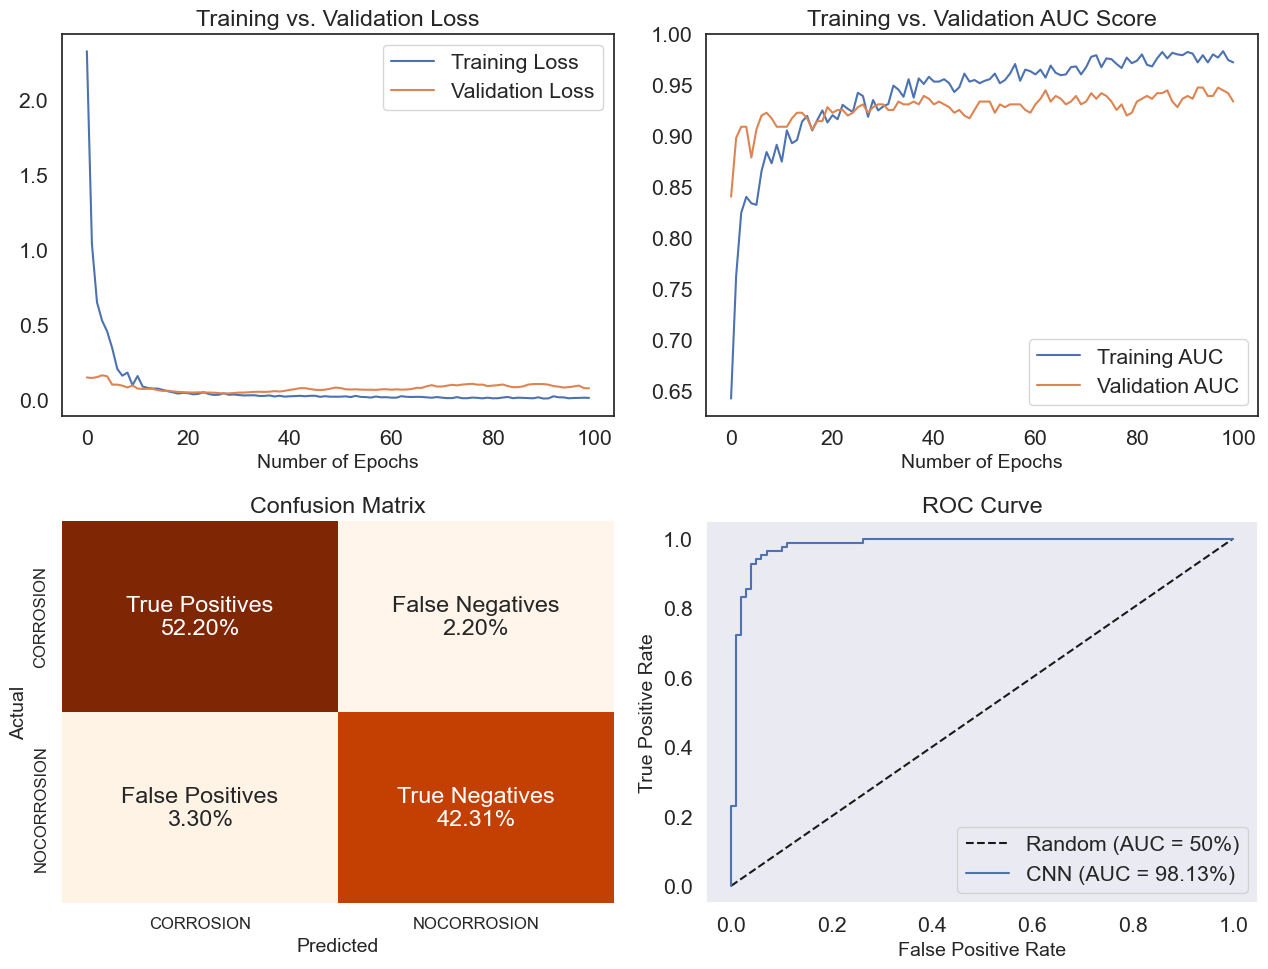

In [35]:
metrics_focal_50 = create_charts(resnet50_model_focal_eidt, history_focal_edit_50)

In [36]:
# Get predictions
y_true_focal_50 = test_generator.classes
y_pred_probs_focal_50 = resnet50_model_focal_eidt.predict(test_generator)
y_pred_focal_50 = (y_pred_probs_focal_50 > 0.5).astype(int)

# Get class names from generator
class_names_focal_50 = list(test_generator.class_indices.keys())

# Print class-wise metrics
report_focal_50 = classification_report(y_true_focal_50, y_pred_focal_50, target_names=class_names_focal_50, digits=4)
print("📊 [Classification Report]")
print(report_focal_50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step
📊 [Classification Report]
              precision    recall  f1-score   support

   CORROSION     0.9406    0.9596    0.9500        99
 NOCORROSION     0.9506    0.9277    0.9390        83

    accuracy                         0.9451       182
   macro avg     0.9456    0.9437    0.9445       182
weighted avg     0.9452    0.9451    0.9450       182



## Model with Attention Block

In [37]:
# === Attention Block ===
def add_attention_block(x, num_heads=4, key_dim=64):
    h, w, c = x.shape[1], x.shape[2], x.shape[3]
    seq_len = h * w

    x_reshaped = Reshape((seq_len, c))(x)
    x_norm = LayerNormalization()(x_reshaped)
    attention_out = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x_norm, x_norm)
    x_added = Add()([x_reshaped, attention_out])
    x_out = Reshape((h, w, c))(x_added)
    return x_out


# === Build Model with Attention ===
def build_model(base_model, dropout, fc_layers):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = add_attention_block(x, num_heads=4, key_dim=64)
    x = Flatten()(x)
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# === Load ResNet50 Base ===
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))
resnet50_model_attention = build_model(base_model, dropout, FC_LAYERS)

# === Compile Model with Binary Cross-Entropy ===
optimizer = Adam(learning_rate=1e-4)
resnet50_model_attention.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=["accuracy"]
)

# === Callbacks ===
checkpoint_path = "./checkpoints/resnet50_model_attention_weights.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor="val_accuracy", save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir="./logs")
callbacks_list = [checkpoint, tensorboard]

# === Train Model ===
print(train_generator.class_indices)
resnet50_model_attention.summary()

history_attention_50 = resnet50_model_attention.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks_list,
    shuffle=True
)

{'CORROSION': 0, 'NOCORROSION': 1}


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 32, 32, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 32, 32, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 42,601,089 (162.51 MB)

 Trainable params: 19,013,377 (72.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6221 - loss: 1.7662
Epoch 1: val_accuracy improved from -inf to 0.84341, saving model to ./checkpoints/resnet50_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.6281 - loss: 1.7244 - val_accuracy: 0.8434 - val_loss: 0.5579
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8172 - loss: 0.6814
Epoch 2: val_accuracy improved from 0.84341 to 0.89286, saving model to ./checkpoints/resnet50_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.8197 - loss: 0.6717 - val_accuracy: 0.8929 - val_loss: 0.3700
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8715 - loss: 0.4869
Epoch 3: val_accuracy improved from 0.89286 to 0.90934, saving model to ./checkpoints/resnet50_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.8729 - loss: 0.4810 - val_accuracy: 0.9093 - val_loss: 0.3367
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9094 - loss: 0.3066
Epoch 4: val_accuracy improved from 0.90934 to 0.92308, saving model to ./checkpoints/resnet50_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9092 - loss: 0.3074 - val_accuracy: 0.9231 - val_loss: 0.2908
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9134 - loss: 0.2692
Epoch 5: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9129 - loss: 0.2679 - val_accuracy: 0.9176 - val_loss: 0.2802
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9175 - loss: 0.2370
Epoch 6: val_accuracy improved from 0.92308 to 0.92857, saving model to ./checkpoints/resnet50_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9178 - loss: 0.2373 - val_accuracy: 0.9286 - val_loss: 0.2786
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9279 - loss: 0.2101
Epoch 7: val_accuracy improved from 0.92857 to 0.93132, saving model to ./checkpoints/resnet50_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9282 - loss: 0.2107 - val_accuracy: 0.9313 - val_loss: 0.2902
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9521 - loss: 0.1452
Epoch 8: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9508 - loss: 0.1476 - val_accuracy: 0.9286 - val_loss: 0.2826
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9469 - loss: 0.1631
Epoch 9: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9464 - loss: 0.1640 - val_accuracy: 0.9313 - val_loss: 0.2719
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9476 - loss: 0.1223
Epoch 10: val_accuracy improved from 0.93132 to 0.93956, saving model to ./checkpoints/resnet50_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9484 - loss: 0.1216 - val_accuracy: 0.9396 - val_loss: 0.2610
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9675 - loss: 0.0809
Epoch 11: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9678 - loss: 0.0815 - val_accuracy: 0.9313 - val_loss: 0.3100
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9683 - loss: 0.1048
Epoch 12: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9683 - loss: 0.1049 - val_accuracy: 0.9341 - val_loss: 0.2784
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9744 - loss: 0.0745
Epoch 13: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9744 - loss: 0.0743 - val_accuracy: 0.9341 - val_loss: 0.2669
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9736 - loss: 0.1078
Epoch 14: val_accuracy improved from 0.93956

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9739 - loss: 0.1058 - val_accuracy: 0.9423 - val_loss: 0.2710
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9740 - loss: 0.0685
Epoch 15: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9742 - loss: 0.0677 - val_accuracy: 0.9286 - val_loss: 0.2730
Epoch 16/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9800 - loss: 0.0510
Epoch 16: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9798 - loss: 0.0510 - val_accuracy: 0.9313 - val_loss: 0.2969
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9837 - loss: 0.0432
Epoch 17: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9840 - loss: 0.0427 - val_accuracy: 0.9313 - val_loss: 0.3198
Epoch 18/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9732 - loss: 0.0830
Epoch 18: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9952 - loss: 0.0163 - val_accuracy: 0.9451 - val_loss: 0.3982
Epoch 44/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9907 - loss: 0.0285
Epoch 44: val_accuracy did not improve from 0.94505
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9909 - loss: 0.0278 - val_accuracy: 0.9423 - val_loss: 0.3632
Epoch 45/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9984 - loss: 0.0056
Epoch 45: val_accuracy improved from 0.94505 to 0.94780, saving model to ./checkpoints/resnet50_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9983 - loss: 0.0060 - val_accuracy: 0.9478 - val_loss: 0.3531
Epoch 46/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9948 - loss: 0.0143
Epoch 46: val_accuracy did not improve from 0.94780
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9949 - loss: 0.0143 - val_accuracy: 0.9368 - val_loss: 0.3776
Epoch 47/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9935 - loss: 0.0175
Epoch 47: val_accuracy did not improve from 0.94780
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9936 - loss: 0.0176 - val_accuracy: 0.9478 - val_loss: 0.3562
Epoch 48/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9931 - loss: 0.0182
Epoch 48: val_accuracy did not improve from 0.94780
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9931 - loss: 0.0182 - val_accuracy: 0.9423 - val_loss: 0.3609
Epoch 49/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9962 - loss: 0.0124
Epoch 49: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9505 - val_loss: 0.3513
Epoch 52/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9926 - loss: 0.0140
Epoch 52: val_accuracy did not improve from 0.95055
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9927 - loss: 0.0139 - val_accuracy: 0.9478 - val_loss: 0.3609
Epoch 53/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9992 - loss: 0.0067
Epoch 53: val_accuracy did not improve from 0.95055
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9990 - loss: 0.0072 - val_accuracy: 0.9478 - val_loss: 0.3905
Epoch 54/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9988 - loss: 0.0036
Epoch 54: val_accuracy did not improve from 0.95055
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9987 - loss: 0.0037 - val_accuracy: 0.9478 - val_loss: 0.4057
Epoch 55/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9944 - loss: 0.0168
Epoch 55: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9533 - val_loss: 0.4760
Epoch 86/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9984 - loss: 0.0098
Epoch 86: val_accuracy did not improve from 0.95330
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9984 - loss: 0.0097 - val_accuracy: 0.9533 - val_loss: 0.4613
Epoch 87/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9962 - loss: 0.0039
Epoch 87: val_accuracy did not improve from 0.95330
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9964 - loss: 0.0037 - val_accuracy: 0.9451 - val_loss: 0.4866
Epoch 88/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 9.0801e-04
Epoch 88: val_accuracy did not improve from 0.95330
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 1.0000 - loss: 9.0091e-04 - val_accuracy: 0.9478 - val_loss: 0.5063
Epoch 89/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 0.0014
Epoch 89: val_accuracy did not impro

1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001EDCE0B1630> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
[Summary Statistics]
Accuracy = 95.05% | Precision = 97.87% | Recall = 92.93% | Specificity = 97.59% | F1 Score = 95.34%


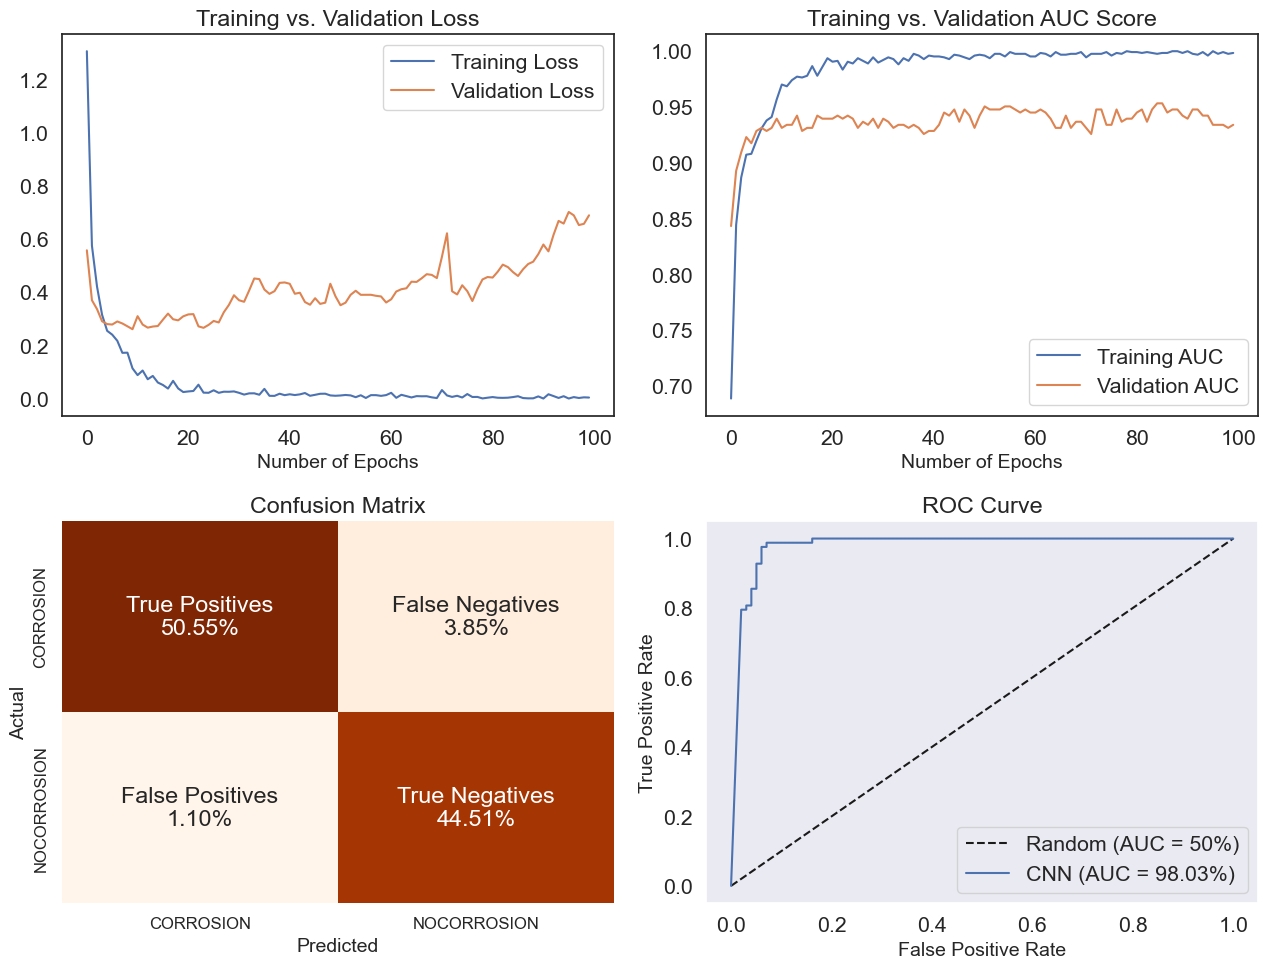

In [38]:
metrics_attention_50 = create_charts(resnet50_model_attention, history_attention_50)

In [39]:
# === Get predictions ===
y_true_attention_50 = test_generator.classes
y_pred_probs_attention_50 = resnet50_model_attention.predict(test_generator)
y_pred_attention_50 = (y_pred_probs_attention_50 > 0.5).astype(int)

# === Get class names from generator ===
class_names_attention_50 = list(test_generator.class_indices.keys())

# === Print class-wise metrics ===
report_attention_50 = classification_report(
    y_true_attention_50,
    y_pred_attention_50,
    target_names=class_names_attention_50,
    digits=4
)

print("📊 [Classification Report - Attention Only]")
print(report_attention_50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step
📊 [Classification Report - Attention Only]
              precision    recall  f1-score   support

   CORROSION     0.9787    0.9293    0.9534        99
 NOCORROSION     0.9205    0.9759    0.9474        83

    accuracy                         0.9505       182
   macro avg     0.9496    0.9526    0.9504       182
weighted avg     0.9522    0.9505    0.9506       182



<h3>Model with Modified Focal Loss + Attention Block</h3>

In [40]:
# === Attention Block ===
def add_attention_block(x, num_heads=4, key_dim=64):
    # Get shape dynamically
    h, w, c = x.shape[1], x.shape[2], x.shape[3]
    seq_len = h * w

    # Reshape to (batch, sequence, channels)
    x_reshaped = Reshape((seq_len, c))(x)

    # Layer normalization
    x_norm = LayerNormalization()(x_reshaped)

    # Apply multi-head self-attention
    attention_out = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x_norm, x_norm)

    # Residual connection
    x_added = Add()([x_reshaped, attention_out])

    # Reshape back to (h, w, c)
    x_out = Reshape((h, w, c))(x_added)
    
    return x_out


# === Build Model with Attention ===
def build_model(base_model, dropout, fc_layers):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = add_attention_block(x, num_heads=4, key_dim=64)
    x = Flatten()(x)
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# === Load ResNet50 Base ===
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))
resnet50_model_focal_attention = build_model(base_model, dropout, FC_LAYERS)

# === Compile Model ===
optimizer = Adam(learning_rate=1e-4)
resnet50_model_focal_attention.compile(
    optimizer=optimizer,
    loss=modified_focal_loss(gamma=2.0, alpha=0.5),
    metrics=["accuracy"]
)

# === Callbacks ===
checkpoint_path = "./checkpoints/resnet50_model_focal_attention_weights.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor="val_accuracy", save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir="./logs")
callbacks_list = [checkpoint, tensorboard]

# === Train Model ===
print(train_generator.class_indices)
resnet50_model_focal_attention.summary()

history_focal_attention_50 = resnet50_model_focal_attention.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks_list,
    shuffle=True
)

{'CORROSION': 0, 'NOCORROSION': 1}


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 32, 32, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 32, 32, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 42,601,089 (162.51 MB)

 Trainable params: 19,013,377 (72.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5776 - loss: 4.5244
Epoch 1: val_accuracy improved from -inf to 0.84890, saving model to ./checkpoints/resnet50_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.5847 - loss: 4.3851 - val_accuracy: 0.8489 - val_loss: 0.4507
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7987 - loss: 1.5155
Epoch 2: val_accuracy improved from 0.84890 to 0.89835, saving model to ./checkpoints/resnet50_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.7997 - loss: 1.4885 - val_accuracy: 0.8984 - val_loss: 0.2520
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8190 - loss: 0.8312
Epoch 3: val_accuracy did not improve from 0.89835
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8191 - loss: 0.8236 - val_accuracy: 0.8929 - val_loss: 0.1948
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8173 - loss: 0.5685
Epoch 4: val_accuracy improved from 0.89835 to 0.90110, saving model to ./checkpoints/resnet50_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.8178 - loss: 0.5701 - val_accuracy: 0.9011 - val_loss: 0.1810
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8282 - loss: 0.4189
Epoch 5: val_accuracy did not improve from 0.90110
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8290 - loss: 0.4228 - val_accuracy: 0.8929 - val_loss: 0.1367
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8315 - loss: 0.3453
Epoch 6: val_accuracy improved from 0.90110 to 0.91484, saving model to ./checkpoints/resnet50_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.8325 - loss: 0.3411 - val_accuracy: 0.9148 - val_loss: 0.1308
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8757 - loss: 0.3471
Epoch 7: val_accuracy did not improve from 0.91484
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8746 - loss: 0.3393 - val_accuracy: 0.9011 - val_loss: 0.1115
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8839 - loss: 0.1282
Epoch 8: val_accuracy did not improve from 0.91484
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8846 - loss: 0.1314 - val_accuracy: 0.9121 - val_loss: 0.1117
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8866 - loss: 0.1675
Epoch 9: val_accuracy improved from 0.91484 to 0.92033, saving model to ./checkpoints/resnet50_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.8870 - loss: 0.1636 - val_accuracy: 0.9203 - val_loss: 0.1210
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8846 - loss: 0.1459
Epoch 10: val_accuracy did not improve from 0.92033
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8847 - loss: 0.1435 - val_accuracy: 0.9011 - val_loss: 0.1121
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8717 - loss: 0.1212
Epoch 11: val_accuracy did not improve from 0.92033
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8723 - loss: 0.1214 - val_accuracy: 0.9066 - val_loss: 0.1114
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8986 - loss: 0.0741
Epoch 12: val_accuracy did not improve from 0.92033
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8981 - loss: 0.0749 - val_accuracy: 0.9121 - val_loss: 0.0958
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9006 - loss: 0.0710
Epoch 13: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.8964 - loss: 0.0725 - val_accuracy: 0.9231 - val_loss: 0.0871
Epoch 16/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9103 - loss: 0.0609
Epoch 16: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9103 - loss: 0.0613 - val_accuracy: 0.9011 - val_loss: 0.0724
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9106 - loss: 0.0624
Epoch 17: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9107 - loss: 0.0636 - val_accuracy: 0.9066 - val_loss: 0.0632
Epoch 18/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8889 - loss: 0.0676
Epoch 18: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8896 - loss: 0.0675 - val_accuracy: 0.9148 - val_loss: 0.0655
Epoch 19/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9199 - loss: 0.0437
Epoch 19: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9328 - loss: 0.0345 - val_accuracy: 0.9258 - val_loss: 0.0727
Epoch 35/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9548 - loss: 0.0240
Epoch 35: val_accuracy improved from 0.92582 to 0.93132, saving model to ./checkpoints/resnet50_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9538 - loss: 0.0244 - val_accuracy: 0.9313 - val_loss: 0.0768
Epoch 36/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9410 - loss: 0.0219
Epoch 36: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9415 - loss: 0.0216 - val_accuracy: 0.9231 - val_loss: 0.0812
Epoch 37/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9523 - loss: 0.0193
Epoch 37: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9523 - loss: 0.0195 - val_accuracy: 0.9203 - val_loss: 0.0825
Epoch 38/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9538 - loss: 0.0207
Epoch 38: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9533 - loss: 0.0211 - val_accuracy: 0.9231 - val_loss: 0.0825
Epoch 39/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9540 - loss: 0.0177
Epoch 39: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9783 - loss: 0.0097 - val_accuracy: 0.9341 - val_loss: 0.1089
Epoch 55/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9767 - loss: 0.0138
Epoch 55: val_accuracy did not improve from 0.93407
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9763 - loss: 0.0139 - val_accuracy: 0.9341 - val_loss: 0.1100
Epoch 56/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9805 - loss: 0.0080
Epoch 56: val_accuracy did not improve from 0.93407
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9800 - loss: 0.0083 - val_accuracy: 0.9341 - val_loss: 0.1073
Epoch 57/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9674 - loss: 0.0165
Epoch 57: val_accuracy improved from 0.93407 to 0.93681, saving model to ./checkpoints/resnet50_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.9679 - loss: 0.0163 - val_accuracy: 0.9368 - val_loss: 0.1069
Epoch 58/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9733 - loss: 0.0103
Epoch 58: val_accuracy did not improve from 0.93681
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9732 - loss: 0.0103 - val_accuracy: 0.9341 - val_loss: 0.1109
Epoch 59/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9788 - loss: 0.0150
Epoch 59: val_accuracy did not improve from 0.93681
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9789 - loss: 0.0148 - val_accuracy: 0.9341 - val_loss: 0.1036
Epoch 60/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9710 - loss: 0.0138
Epoch 60: val_accuracy did not improve from 0.93681
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9713 - loss: 0.0137 - val_accuracy: 0.9313 - val_loss: 0.1033
Epoch 61/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9712 - loss: 0.0138
Epoch 61: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9815 - loss: 0.0063 - val_accuracy: 0.9396 - val_loss: 0.1467
Epoch 77/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9718 - loss: 0.0194
Epoch 77: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9720 - loss: 0.0191 - val_accuracy: 0.9313 - val_loss: 0.1479
Epoch 78/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9765 - loss: 0.0112
Epoch 78: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9766 - loss: 0.0111 - val_accuracy: 0.9313 - val_loss: 0.1521
Epoch 79/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9835 - loss: 0.0062
Epoch 79: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9834 - loss: 0.0062 - val_accuracy: 0.9258 - val_loss: 0.1628
Epoch 80/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9855 - loss: 0.0077
Epoch 80: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.9844 - loss: 0.0111 - val_accuracy: 0.9423 - val_loss: 0.1651


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
[Summary Statistics]
Accuracy = 95.60% | Precision = 97.89% | Recall = 93.94% | Specificity = 97.59% | F1 Score = 95.88%


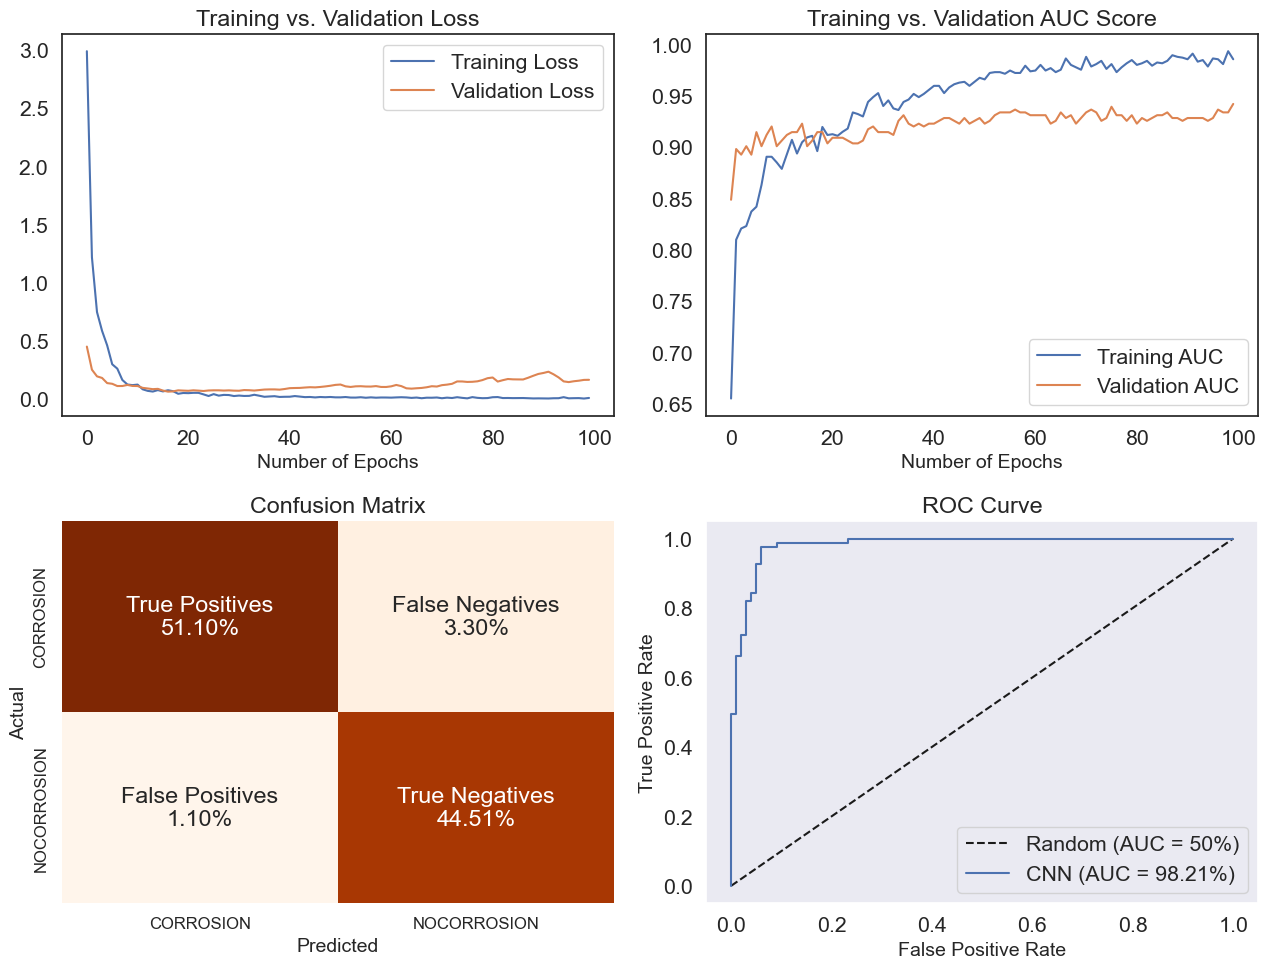

In [41]:
metrics_focal_attention_50 = create_charts(resnet50_model_focal_attention, history_focal_attention_50)

In [42]:
# Get predictions
y_true_focal_attention_50 = test_generator.classes
y_pred_probs_focal_attention_50 = resnet50_model_focal_attention.predict(test_generator)
y_pred_focal_attention_50 = (y_pred_probs_focal_attention_50 > 0.5).astype(int)

# Get class names from generator
class_names_focal_attention_50 = list(test_generator.class_indices.keys())

# Print class-wise metrics
report_focal_attention_50 = classification_report(y_true_focal_attention_50, y_pred_focal_attention_50, target_names=class_names_focal_attention_50, digits=4)
print("📊 [Classification Report]")
print(report_focal_attention_50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step
📊 [Classification Report]
              precision    recall  f1-score   support

   CORROSION     0.9789    0.9394    0.9588        99
 NOCORROSION     0.9310    0.9759    0.9529        83

    accuracy                         0.9560       182
   macro avg     0.9550    0.9576    0.9559       182
weighted avg     0.9571    0.9560    0.9561       182



# ResNet101

<h3>Basic</h3>

In [43]:
# === Build Model ===
def build_model(base_model, dropout, fc_layers):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# === Load ResNet101 Base Model ===
base_model_1 = ResNet101(
    weights='imagenet',
    include_top=False,
    input_shape=(HEIGHT, WIDTH, 3)
)

resnet101_model_basic = build_model(base_model_1, dropout, FC_LAYERS)

# === Compile Model ===
optimizer = Adam(learning_rate=1e-4)
resnet101_model_basic.compile(optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# === Callbacks ===
checkpoint_path = "./checkpoints/resnet101_model_basic_weights.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor="val_accuracy", save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir="./logs")
callbacks_list = [checkpoint, tensorboard]

# === Summary ===
print(train_generator.class_indices)
resnet101_model_basic.summary()

# === Train Model ===
history_basic_101 = resnet101_model_basic.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks_list,
    shuffle=True
)

{'CORROSION': 0, 'NOCORROSION': 1}


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 32, 32, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 32, 32, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 59,567,489 (227.23 MB)

 Trainable params: 16,909,313 (64.50 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5529 - loss: 2.8462
Epoch 1: val_accuracy improved from -inf to 0.86538, saving model to ./checkpoints/resnet101_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.5604 - loss: 2.7658 - val_accuracy: 0.8654 - val_loss: 0.3860
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7756 - loss: 0.7418
Epoch 2: val_accuracy improved from 0.86538 to 0.87912, saving model to ./checkpoints/resnet101_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.7779 - loss: 0.7356 - val_accuracy: 0.8791 - val_loss: 0.2994
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8354 - loss: 0.5673
Epoch 3: val_accuracy improved from 0.87912 to 0.90110, saving model to ./checkpoints/resnet101_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8367 - loss: 0.5616 - val_accuracy: 0.9011 - val_loss: 0.3159
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8835 - loss: 0.3650
Epoch 4: val_accuracy did not improve from 0.90110
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.8836 - loss: 0.3657 - val_accuracy: 0.9011 - val_loss: 0.2743
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8903 - loss: 0.3238
Epoch 5: val_accuracy did not improve from 0.90110
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8910 - loss: 0.3211 - val_accuracy: 0.9011 - val_loss: 0.2805
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9094 - loss: 0.2441
Epoch 6: val_accuracy improved from 0.90110 to 0.90659, saving model to ./checkpoints/resnet101_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9095 - loss: 0.2448 - val_accuracy: 0.9066 - val_loss: 0.2423
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9132 - loss: 0.2844
Epoch 7: val_accuracy improved from 0.90659 to 0.90934, saving model to ./checkpoints/resnet101_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9134 - loss: 0.2829 - val_accuracy: 0.9093 - val_loss: 0.2423
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9302 - loss: 0.1866
Epoch 8: val_accuracy improved from 0.90934 to 0.92308, saving model to ./checkpoints/resnet101_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9306 - loss: 0.1868 - val_accuracy: 0.9231 - val_loss: 0.2149
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9259 - loss: 0.1993
Epoch 9: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.9255 - loss: 0.2020 - val_accuracy: 0.9231 - val_loss: 0.2071
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9417 - loss: 0.1915
Epoch 10: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.9420 - loss: 0.1901 - val_accuracy: 0.9203 - val_loss: 0.2325
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9394 - loss: 0.1716
Epoch 11: val_accuracy improved from 0.92308 to 0.92582, saving model to ./checkpoints/resnet101_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9397 - loss: 0.1706 - val_accuracy: 0.9258 - val_loss: 0.2283
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9564 - loss: 0.1241
Epoch 12: val_accuracy did not improve from 0.92582
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9556 - loss: 0.1257 - val_accuracy: 0.9203 - val_loss: 0.2434
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9549 - loss: 0.1214
Epoch 13: val_accuracy did not improve from 0.92582
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9545 - loss: 0.1222 - val_accuracy: 0.9203 - val_loss: 0.2368
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9652 - loss: 0.0973
Epoch 14: val_accuracy did not improve from 0.92582
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9644 - loss: 0.0993 - val_accuracy: 0.9258 - val_loss: 0.2369
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9612 - loss: 0.1207
Epoch 15: val_accuracy improved from 0.92582

10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.9607 - loss: 0.1213 - val_accuracy: 0.9286 - val_loss: 0.2301
Epoch 16/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9595 - loss: 0.1089
Epoch 16: val_accuracy did not improve from 0.92857
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9596 - loss: 0.1086 - val_accuracy: 0.9258 - val_loss: 0.2237
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9706 - loss: 0.0727
Epoch 17: val_accuracy did not improve from 0.92857
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9704 - loss: 0.0735 - val_accuracy: 0.9286 - val_loss: 0.2108
Epoch 18/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9679 - loss: 0.0795
Epoch 18: val_accuracy did not improve from 0.92857
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9678 - loss: 0.0797 - val_accuracy: 0.9258 - val_loss: 0.2072
Epoch 19/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9668 - loss: 0.0677
Epoch 19: val_accuracy improved from 0.92857

10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.9670 - loss: 0.0677 - val_accuracy: 0.9313 - val_loss: 0.2093
Epoch 20/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9735 - loss: 0.0727
Epoch 20: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9733 - loss: 0.0738 - val_accuracy: 0.9313 - val_loss: 0.2095
Epoch 21/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9703 - loss: 0.0866
Epoch 21: val_accuracy improved from 0.93132 to 0.94231, saving model to ./checkpoints/resnet101_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.9704 - loss: 0.0860 - val_accuracy: 0.9423 - val_loss: 0.1897
Epoch 22/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9700 - loss: 0.0834
Epoch 22: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9703 - loss: 0.0830 - val_accuracy: 0.9396 - val_loss: 0.2035
Epoch 23/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9732 - loss: 0.0819
Epoch 23: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9733 - loss: 0.0811 - val_accuracy: 0.9341 - val_loss: 0.2033
Epoch 24/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9743 - loss: 0.0489
Epoch 24: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9740 - loss: 0.0506 - val_accuracy: 0.9396 - val_loss: 0.2000
Epoch 25/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9771 - loss: 0.0681
Epoch 25: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9864 - loss: 0.0396 - val_accuracy: 0.9451 - val_loss: 0.2004
Epoch 34/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9910 - loss: 0.0306
Epoch 34: val_accuracy did not improve from 0.94505
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9908 - loss: 0.0310 - val_accuracy: 0.9423 - val_loss: 0.1988
Epoch 35/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9877 - loss: 0.0387
Epoch 35: val_accuracy did not improve from 0.94505
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9877 - loss: 0.0384 - val_accuracy: 0.9423 - val_loss: 0.2038
Epoch 36/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9910 - loss: 0.0317
Epoch 36: val_accuracy did not improve from 0.94505
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9910 - loss: 0.0318 - val_accuracy: 0.9396 - val_loss: 0.2022
Epoch 37/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9829 - loss: 0.0347
Epoch 37: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9936 - loss: 0.0181 - val_accuracy: 0.9478 - val_loss: 0.2403
Epoch 73/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9936 - loss: 0.0147
Epoch 73: val_accuracy did not improve from 0.94780
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.9936 - loss: 0.0146 - val_accuracy: 0.9478 - val_loss: 0.2533
Epoch 74/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9964 - loss: 0.0113
Epoch 74: val_accuracy improved from 0.94780 to 0.95055, saving model to ./checkpoints/resnet101_model_basic_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9505 - val_loss: 0.2719
Epoch 75/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9972 - loss: 0.0087
Epoch 75: val_accuracy did not improve from 0.95055
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.9970 - loss: 0.0093 - val_accuracy: 0.9451 - val_loss: 0.2843
Epoch 76/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9925 - loss: 0.0261
Epoch 76: val_accuracy did not improve from 0.95055
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9926 - loss: 0.0258 - val_accuracy: 0.9478 - val_loss: 0.2632
Epoch 77/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9935 - loss: 0.0158
Epoch 77: val_accuracy did not improve from 0.95055
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9936 - loss: 0.0157 - val_accuracy: 0.9368 - val_loss: 0.2697
Epoch 78/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9962 - loss: 0.0119
Epoch 78: val_accuracy did not improve from 

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
[Summary Statistics]
Accuracy = 94.51% | Precision = 94.06% | Recall = 95.96% | Specificity = 92.77% | F1 Score = 95.00%


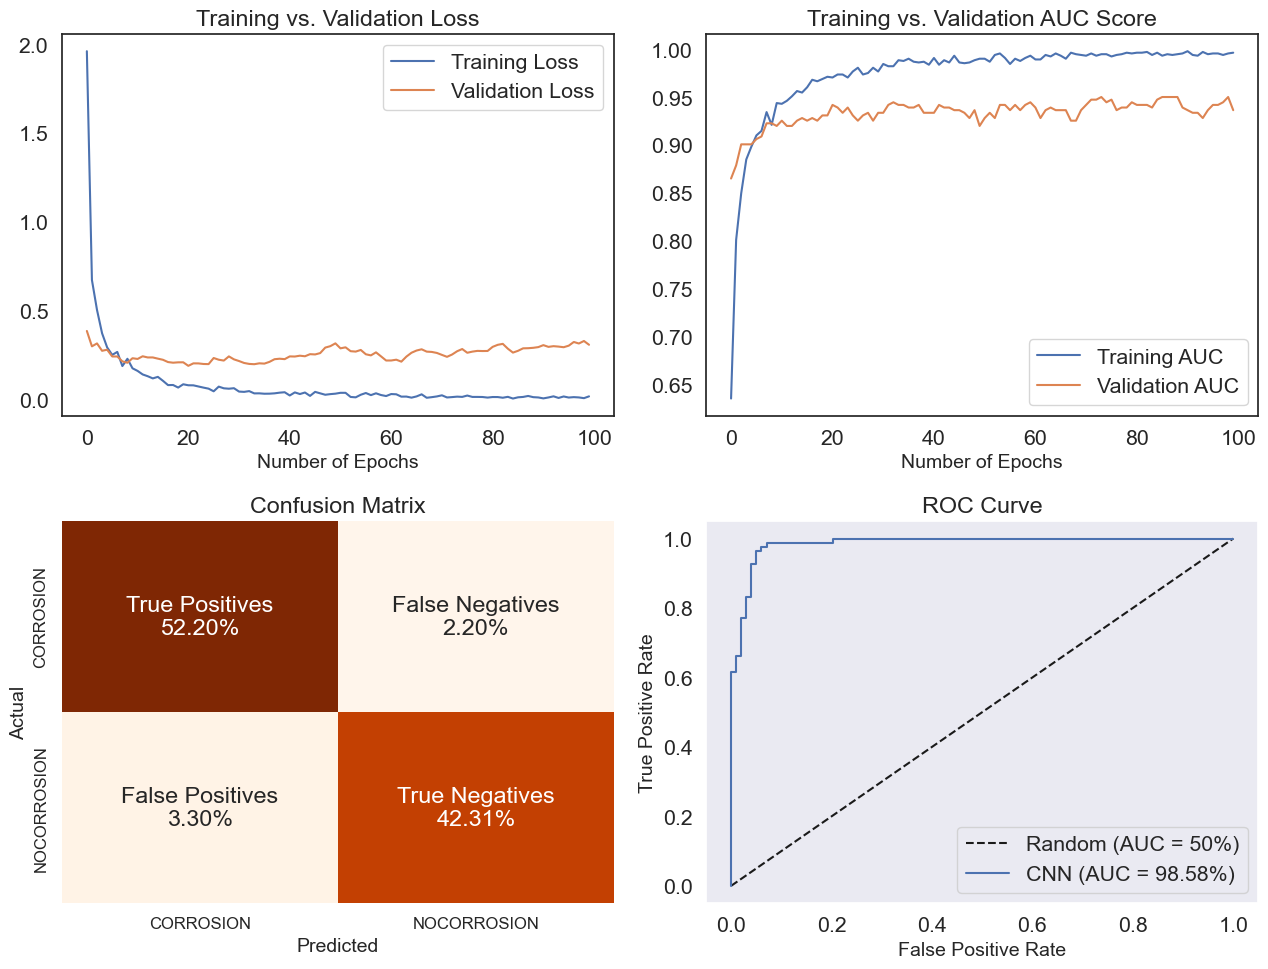

In [44]:
metrics_basic_101 = create_charts(resnet101_model_basic, history_basic_101)

In [45]:
# Get predictions
y_true_basic_101 = test_generator.classes
y_pred_probs_basic_101 = resnet101_model_basic.predict(test_generator)
y_pred_basic_101 = (y_pred_probs_basic_101 > 0.5).astype(int)

# Get class names from generator
class_names_basic_101 = list(test_generator.class_indices.keys())

# Print class-wise metrics
report_basic_101 = classification_report(y_true_basic_101, y_pred_basic_101, target_names=class_names_basic_101, digits=4)
print("📊 [Classification Report]")
print(report_basic_101)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 696ms/step
📊 [Classification Report]
              precision    recall  f1-score   support

   CORROSION     0.9406    0.9596    0.9500        99
 NOCORROSION     0.9506    0.9277    0.9390        83

    accuracy                         0.9451       182
   macro avg     0.9456    0.9437    0.9445       182
weighted avg     0.9452    0.9451    0.9450       182



<h3>Model with Modified Focal Loss</h3>

In [46]:
# === Modified Custom Focal Loss ===
def modified_focal_loss(gamma=2.0, alpha=0.5):
    def loss_fn(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1. - tf.keras.backend.epsilon())
        
        # Calculate pt
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        
        # Standard focal loss components
        weight = alpha * y_true * tf.pow(1 - y_pred, gamma) + \
                 (1 - alpha) * (1 - y_true) * tf.pow(y_pred, gamma)
        
        # Modified term: log(1 + 1/pt)
        additional_term = tf.math.log(1 + (1 / pt))
        
        # Combine standard focal loss with modified term
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        loss = weight * cross_entropy * additional_term
        
        return tf.reduce_mean(loss)
    
    return loss_fn

# === Build Model ===
def build_model(base_model, dropout, fc_layers):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# === Load ResNet101 Base ===
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))
resnet101_model_focal_edit = build_model(base_model, dropout, FC_LAYERS)

# === Compile Model ===
optimizer = Adam(learning_rate=1e-4)
resnet101_model_focal_edit.compile(optimizer, loss=modified_focal_loss(gamma=2.0, alpha=0.5), metrics=["accuracy"])

# === Callbacks ===
checkpoint_path = "./checkpoints/resnet101_model_focal_edit_weights.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor="val_accuracy", save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir="./logs")
callbacks_list = [checkpoint, tensorboard]

# === Summary ===
print(train_generator.class_indices)
resnet101_model_focal_edit.summary()

# === Train Model ===
history_focal_edit_101 = resnet101_model_focal_edit.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks_list,
    shuffle=True
)

{'CORROSION': 0, 'NOCORROSION': 1}


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 32, 32, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 32, 32, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 59,567,489 (227.23 MB)

 Trainable params: 16,909,313 (64.50 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6284 - loss: 5.9829
Epoch 1: val_accuracy improved from -inf to 0.86264, saving model to ./checkpoints/resnet101_model_focal_edit_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.6344 - loss: 5.8063 - val_accuracy: 0.8626 - val_loss: 0.6789
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7885 - loss: 1.8789
Epoch 2: val_accuracy improved from 0.86264 to 0.88187, saving model to ./checkpoints/resnet101_model_focal_edit_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.7902 - loss: 1.8581 - val_accuracy: 0.8819 - val_loss: 0.4627
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 407s/step - accuracy: 0.8292 - loss: 1.3599  
Epoch 3: val_accuracy improved from 0.88187 to 0.90110, saving model to ./checkpoints/resnet101_model_focal_edit_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 3679s 408s/step - accuracy: 0.8292 - loss: 1.3471 - val_accuracy: 0.9011 - val_loss: 0.2486
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8546 - loss: 0.6416
Epoch 4: val_accuracy did not improve from 0.90110
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.8545 - loss: 0.6396 - val_accuracy: 0.8956 - val_loss: 0.1546
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8658 - loss: 0.5036
Epoch 5: val_accuracy improved from 0.90110 to 0.90385, saving model to ./checkpoints/resnet101_model_focal_edit_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8659 - loss: 0.5046 - val_accuracy: 0.9038 - val_loss: 0.1424
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8699 - loss: 0.4128
Epoch 6: val_accuracy did not improve from 0.90385
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.8701 - loss: 0.4067 - val_accuracy: 0.9038 - val_loss: 0.1180
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8609 - loss: 0.4474
Epoch 7: val_accuracy improved from 0.90385 to 0.91209, saving model to ./checkpoints/resnet101_model_focal_edit_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8619 - loss: 0.4382 - val_accuracy: 0.9121 - val_loss: 0.1039
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8704 - loss: 0.2989
Epoch 8: val_accuracy did not improve from 0.91209
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.8705 - loss: 0.2982 - val_accuracy: 0.9038 - val_loss: 0.1178
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8854 - loss: 0.3074
Epoch 9: val_accuracy improved from 0.91209 to 0.91484, saving model to ./checkpoints/resnet101_model_focal_edit_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8853 - loss: 0.3026 - val_accuracy: 0.9148 - val_loss: 0.0948
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8914 - loss: 0.1313
Epoch 10: val_accuracy improved from 0.91484 to 0.92033, saving model to ./checkpoints/resnet101_model_focal_edit_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8920 - loss: 0.1325 - val_accuracy: 0.9203 - val_loss: 0.0913
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8744 - loss: 0.1786
Epoch 11: val_accuracy improved from 0.92033 to 0.92582, saving model to ./checkpoints/resnet101_model_focal_edit_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8748 - loss: 0.1785 - val_accuracy: 0.9258 - val_loss: 0.0724
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9174 - loss: 0.0709
Epoch 12: val_accuracy improved from 0.92582 to 0.92857, saving model to ./checkpoints/resnet101_model_focal_edit_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9171 - loss: 0.0716 - val_accuracy: 0.9286 - val_loss: 0.0700
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9143 - loss: 0.0998
Epoch 13: val_accuracy improved from 0.92857 to 0.93132, saving model to ./checkpoints/resnet101_model_focal_edit_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9130 - loss: 0.1001 - val_accuracy: 0.9313 - val_loss: 0.0760
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8903 - loss: 0.1125
Epoch 14: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.8904 - loss: 0.1137 - val_accuracy: 0.9231 - val_loss: 0.0730
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8997 - loss: 0.1266
Epoch 15: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9000 - loss: 0.1244 - val_accuracy: 0.9203 - val_loss: 0.0554
Epoch 16/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9159 - loss: 0.0741
Epoch 16: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9155 - loss: 0.0747 - val_accuracy: 0.9148 - val_loss: 0.0454
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8768 - loss: 0.0913
Epoch 17: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9457 - loss: 0.0301 - val_accuracy: 0.9341 - val_loss: 0.0582
Epoch 57/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9538 - loss: 0.0352
Epoch 57: val_accuracy improved from 0.93407 to 0.94231, saving model to ./checkpoints/resnet101_model_focal_edit_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.9539 - loss: 0.0340 - val_accuracy: 0.9423 - val_loss: 0.0513
Epoch 58/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9602 - loss: 0.0221
Epoch 58: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9604 - loss: 0.0221 - val_accuracy: 0.9396 - val_loss: 0.0500
Epoch 59/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9461 - loss: 0.0210
Epoch 59: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9463 - loss: 0.0211 - val_accuracy: 0.9313 - val_loss: 0.0508
Epoch 60/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9456 - loss: 0.0204
Epoch 60: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.9463 - loss: 0.0203 - val_accuracy: 0.9368 - val_loss: 0.0536
Epoch 61/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9605 - loss: 0.0288
Epoch 61: val_accuracy did not improve from 

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step
[Summary Statistics]
Accuracy = 92.31% | Precision = 90.48% | Recall = 95.96% | Specificity = 87.95% | F1 Score = 93.14%


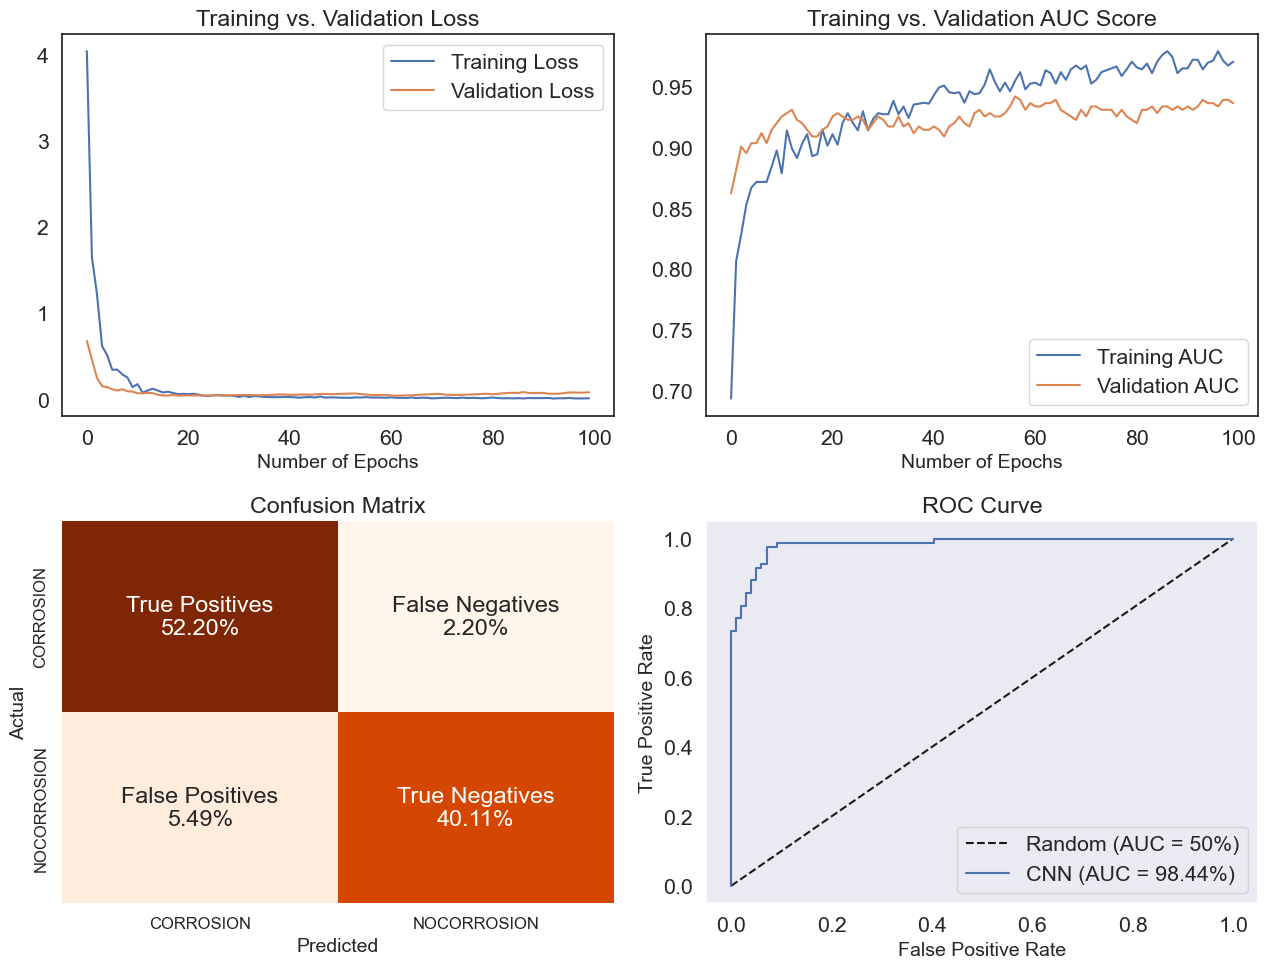

In [47]:
metrics_focal_101 = create_charts(resnet101_model_focal_edit, history_focal_edit_101)

In [48]:
# Get predictions
y_true_focal_101 = test_generator.classes
y_pred_probs_focal_101 = resnet101_model_focal_edit.predict(test_generator)
y_pred_focal_101 = (y_pred_probs_focal_101 > 0.5).astype(int)

# Get class names from generator
class_names_focal_101 = list(test_generator.class_indices.keys())

# Print class-wise metrics
report_focal_101 = classification_report(y_true_focal_101, y_pred_focal_101, target_names=class_names_focal_101, digits=4)
print("📊 [Classification Report]")
print(report_focal_101)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 724ms/step
📊 [Classification Report]
              precision    recall  f1-score   support

   CORROSION     0.9048    0.9596    0.9314        99
 NOCORROSION     0.9481    0.8795    0.9125        83

    accuracy                         0.9231       182
   macro avg     0.9264    0.9196    0.9219       182
weighted avg     0.9245    0.9231    0.9228       182



## Model with Attention Block

In [49]:
# === Attention Block ===
def add_attention_block(x, num_heads=4, key_dim=64):
    h, w, c = x.shape[1], x.shape[2], x.shape[3]
    seq_len = h * w

    x_reshaped = Reshape((seq_len, c))(x)
    x_norm = LayerNormalization()(x_reshaped)
    attention_out = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x_norm, x_norm)
    x_added = Add()([x_reshaped, attention_out])
    x_out = Reshape((h, w, c))(x_added)
    return x_out

# === Build Model with Attention (no focal loss) ===
def build_model(base_model, dropout, fc_layers):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = add_attention_block(x, num_heads=4, key_dim=64)
    x = Flatten()(x)
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# === Load ResNet101 Base ===
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))
resnet101_model_attention = build_model(base_model, dropout, FC_LAYERS)

# === Compile Model (binary cross-entropy) ===
optimizer = Adam(learning_rate=1e-4)
resnet101_model_attention.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=["accuracy"]
)

# === Callbacks ===
checkpoint_path = "./checkpoints/resnet101_model_attention_weights.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor="val_accuracy", save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir="./logs")
callbacks_list = [checkpoint, tensorboard]

# === Train Model ===
print(train_generator.class_indices)
resnet101_model_attention.summary()

history_attention_101 = resnet101_model_attention.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks_list,
    shuffle=True
)


{'CORROSION': 0, 'NOCORROSION': 1}


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 32, 32, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 32, 32, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 61,671,553 (235.26 MB)

 Trainable params: 19,013,377 (72.53 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6460 - loss: 1.4487
Epoch 1: val_accuracy improved from -inf to 0.88187, saving model to ./checkpoints/resnet101_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.6532 - loss: 1.4152 - val_accuracy: 0.8819 - val_loss: 0.4736
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8680 - loss: 0.5344
Epoch 2: val_accuracy improved from 0.88187 to 0.88462, saving model to ./checkpoints/resnet101_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.8686 - loss: 0.5353 - val_accuracy: 0.8846 - val_loss: 0.4713
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8834 - loss: 0.4993
Epoch 3: val_accuracy improved from 0.88462 to 0.90659, saving model to ./checkpoints/resnet101_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.8841 - loss: 0.4985 - val_accuracy: 0.9066 - val_loss: 0.3709
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8852 - loss: 0.4036
Epoch 4: val_accuracy improved from 0.90659 to 0.91209, saving model to ./checkpoints/resnet101_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.8859 - loss: 0.4021 - val_accuracy: 0.9121 - val_loss: 0.3311
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9148 - loss: 0.2621
Epoch 5: val_accuracy improved from 0.91209 to 0.91758, saving model to ./checkpoints/resnet101_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.9150 - loss: 0.2641 - val_accuracy: 0.9176 - val_loss: 0.3002
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9252 - loss: 0.2748
Epoch 6: val_accuracy improved from 0.91758 to 0.93407, saving model to ./checkpoints/resnet101_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.9258 - loss: 0.2699 - val_accuracy: 0.9341 - val_loss: 0.2563
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9368 - loss: 0.2003
Epoch 7: val_accuracy improved from 0.93407 to 0.93681, saving model to ./checkpoints/resnet101_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.9368 - loss: 0.1994 - val_accuracy: 0.9368 - val_loss: 0.2603
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9537 - loss: 0.1204
Epoch 8: val_accuracy improved from 0.93681 to 0.94231, saving model to ./checkpoints/resnet101_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.9537 - loss: 0.1220 - val_accuracy: 0.9423 - val_loss: 0.2666
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9566 - loss: 0.1490
Epoch 9: val_accuracy did not improve from 0.94231
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9570 - loss: 0.1482 - val_accuracy: 0.9423 - val_loss: 0.2911
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9619 - loss: 0.1285
Epoch 10: val_accuracy improved from 0.94231 to 0.94505, saving model to ./checkpoints/resnet101_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.9616 - loss: 0.1285 - val_accuracy: 0.9451 - val_loss: 0.3130
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9666 - loss: 0.0907
Epoch 11: val_accuracy did not improve from 0.94505
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9666 - loss: 0.0934 - val_accuracy: 0.9396 - val_loss: 0.2814
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9709 - loss: 0.1231
Epoch 12: val_accuracy did not improve from 0.94505
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.9710 - loss: 0.1205 - val_accuracy: 0.9423 - val_loss: 0.2742
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9775 - loss: 0.0638
Epoch 13: val_accuracy improved from 0.94505 to 0.95604, saving model to ./checkpoints/resnet101_model_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.9772 - loss: 0.0652 - val_accuracy: 0.9560 - val_loss: 0.2739
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9748 - loss: 0.0725
Epoch 14: val_accuracy did not improve from 0.95604
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9747 - loss: 0.0727 - val_accuracy: 0.9505 - val_loss: 0.2731
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9718 - loss: 0.0710
Epoch 15: val_accuracy did not improve from 0.95604
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9723 - loss: 0.0698 - val_accuracy: 0.9505 - val_loss: 0.2981
Epoch 16/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9746 - loss: 0.0796
Epoch 16: val_accuracy did not improve from 0.95604
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9751 - loss: 0.0791 - val_accuracy: 0.9451 - val_loss: 0.3308
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9883 - loss: 0.0312
Epoch 17: val_accuracy did not improve from 

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step
[Summary Statistics]
Accuracy = 93.41% | Precision = 93.94% | Recall = 93.94% | Specificity = 92.77% | F1 Score = 93.94%


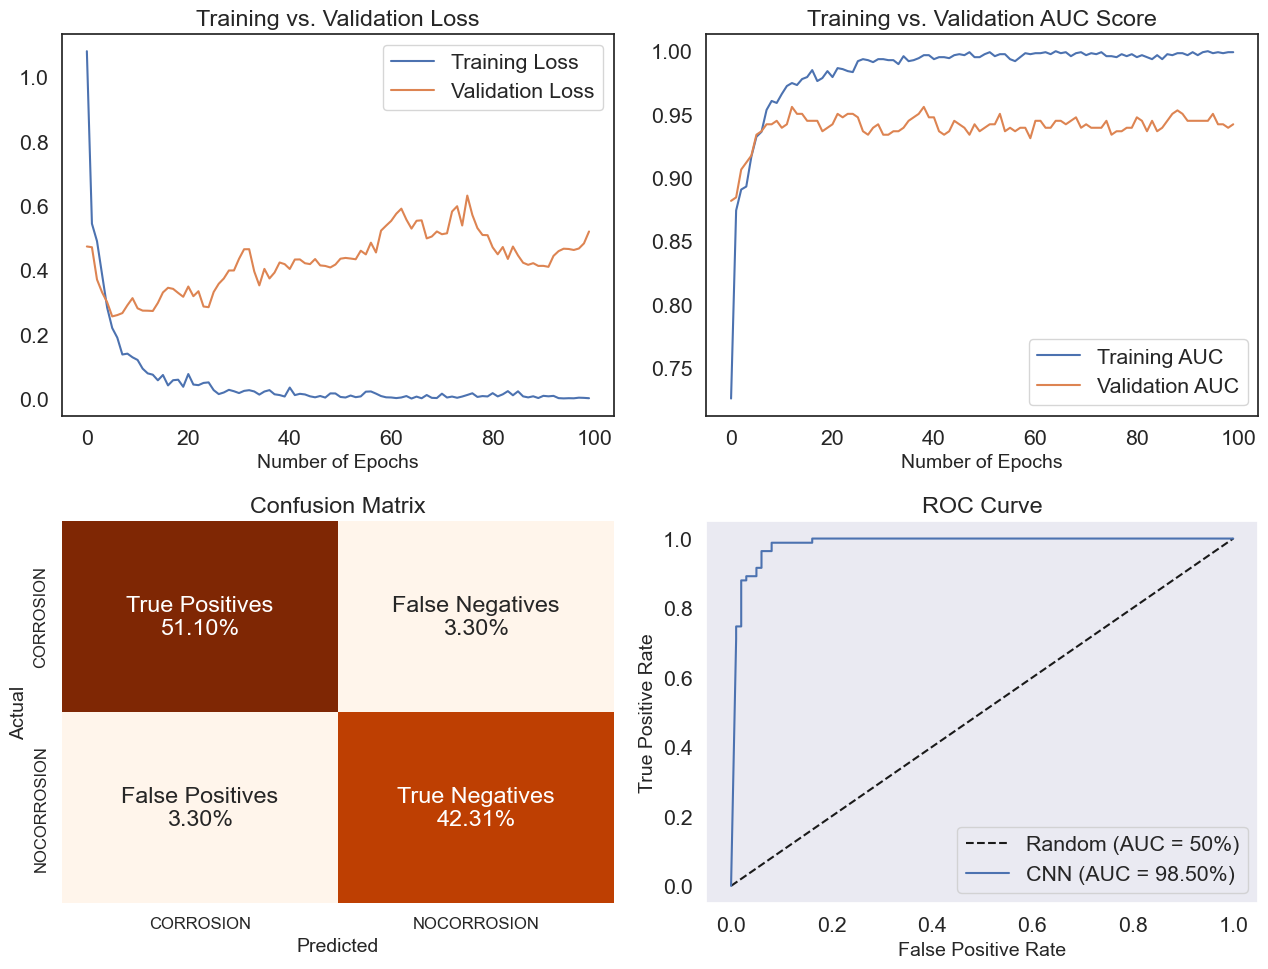

In [50]:
metrics_attention_101 = create_charts(resnet101_model_attention, history_attention_101)

In [51]:
from sklearn.metrics import classification_report

# === Get predictions for ResNet101 - Focal + Attention ===
y_true_101_attn = test_generator.classes
y_pred_probs_101_attn = resnet101_model_attention.predict(test_generator)
y_pred_101_attn = (y_pred_probs_101_attn > 0.5).astype(int)

# === Class labels from generator ===
class_names_101_attn = list(test_generator.class_indices.keys())

# === Generate classification report ===
report_101_attn = classification_report(
    y_true_101_attn,
    y_pred_101_attn,
    target_names=class_names_101_attn,
    digits=4
)

# === Display the report ===
print("📊 [ResNet101 - Focal + Attention] Classification Report:")
print(report_101_attn)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 754ms/step
📊 [ResNet101 - Focal + Attention] Classification Report:
              precision    recall  f1-score   support

   CORROSION     0.9394    0.9394    0.9394        99
 NOCORROSION     0.9277    0.9277    0.9277        83

    accuracy                         0.9341       182
   macro avg     0.9336    0.9336    0.9336       182
weighted avg     0.9341    0.9341    0.9341       182



<h3>Model with Modified Focal Loss + Attention Block</h3>

In [52]:
# === Attention Block ===
def add_attention_block(x, num_heads=4, key_dim=64):
    h, w, c = x.shape[1], x.shape[2], x.shape[3]
    seq_len = h * w

    x_reshaped = Reshape((seq_len, c))(x)
    x_norm = LayerNormalization()(x_reshaped)
    attention_out = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x_norm, x_norm)
    x_added = Add()([x_reshaped, attention_out])
    x_out = Reshape((h, w, c))(x_added)
    return x_out

# === Modified Custom Focal Loss ===
def modified_focal_loss(gamma=2.0, alpha=0.5):
    def loss_fn(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1. - tf.keras.backend.epsilon())
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        weight = alpha * y_true * tf.pow(1 - y_pred, gamma) + \
                 (1 - alpha) * (1 - y_true) * tf.pow(y_pred, gamma)
        additional_term = tf.math.log(1 + (1 / pt))
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        loss = weight * cross_entropy * additional_term
        return tf.reduce_mean(loss)
    return loss_fn

# === Build Model with Attention ===
def build_model(base_model, dropout, fc_layers):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = add_attention_block(x, num_heads=4, key_dim=64)
    x = Flatten()(x)
    for fc in fc_layers:
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# === Load ResNet101 Base ===
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))
resnet101_model_focal_attention = build_model(base_model, dropout, FC_LAYERS)

# === Compile Model ===
optimizer = Adam(learning_rate=1e-4)
resnet101_model_focal_attention.compile(
    optimizer=optimizer,
    loss=modified_focal_loss(gamma=2.0, alpha=0.5),
    metrics=["accuracy"]
)

# === Callbacks ===
checkpoint_path = "./checkpoints/resnet101_model_focal_attention_weights.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor="val_accuracy", save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir="./logs")
callbacks_list = [checkpoint, tensorboard]

# === Train Model ===
print(train_generator.class_indices)
resnet101_model_focal_attention.summary()

history_focal_attention_101 = resnet101_model_focal_attention.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks_list,
    shuffle=True
)

{'CORROSION': 0, 'NOCORROSION': 1}


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 32, 32, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 32, 32, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 61,671,553 (235.26 MB)

 Trainable params: 19,013,377 (72.53 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5654 - loss: 9.3093
Epoch 1: val_accuracy improved from -inf to 0.82692, saving model to ./checkpoints/resnet101_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.5707 - loss: 8.9786 - val_accuracy: 0.8269 - val_loss: 0.6556
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7307 - loss: 1.8448
Epoch 2: val_accuracy improved from 0.82692 to 0.87363, saving model to ./checkpoints/resnet101_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.7323 - loss: 1.8243 - val_accuracy: 0.8736 - val_loss: 0.2757
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7838 - loss: 0.9993
Epoch 3: val_accuracy improved from 0.87363 to 0.87637, saving model to ./checkpoints/resnet101_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.7853 - loss: 0.9883 - val_accuracy: 0.8764 - val_loss: 0.2377
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7999 - loss: 0.6433
Epoch 4: val_accuracy did not improve from 0.87637
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.8010 - loss: 0.6437 - val_accuracy: 0.8654 - val_loss: 0.2136
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8464 - loss: 0.6696
Epoch 5: val_accuracy did not improve from 0.87637
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8461 - loss: 0.6655 - val_accuracy: 0.8626 - val_loss: 0.2205
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8392 - loss: 0.3849
Epoch 6: val_accuracy improved from 0.87637 to 0.88462, saving model to ./checkpoints/resnet101_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8395 - loss: 0.3850 - val_accuracy: 0.8846 - val_loss: 0.1436
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8618 - loss: 0.3229
Epoch 7: val_accuracy improved from 0.88462 to 0.90385, saving model to ./checkpoints/resnet101_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8598 - loss: 0.3247 - val_accuracy: 0.9038 - val_loss: 0.1035
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8329 - loss: 0.3855
Epoch 8: val_accuracy did not improve from 0.90385
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8337 - loss: 0.3796 - val_accuracy: 0.8929 - val_loss: 0.1116
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8577 - loss: 0.1554
Epoch 9: val_accuracy did not improve from 0.90385
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.8582 - loss: 0.1566 - val_accuracy: 0.8901 - val_loss: 0.1250
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8581 - loss: 0.2799
Epoch 10: val_accuracy did not improve from 0.90385
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8593 - loss: 0.2734 - val_accuracy: 0.8984 - val_loss: 0.1183
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8644 - loss: 0.1933
Epoch 11: val_accuracy did not improve from 0.90

10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8886 - loss: 0.0877 - val_accuracy: 0.9066 - val_loss: 0.0870
Epoch 16/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8862 - loss: 0.0835
Epoch 16: val_accuracy improved from 0.90659 to 0.91484, saving model to ./checkpoints/resnet101_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8862 - loss: 0.0855 - val_accuracy: 0.9148 - val_loss: 0.0812
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8951 - loss: 0.1158
Epoch 17: val_accuracy did not improve from 0.91484
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.8951 - loss: 0.1144 - val_accuracy: 0.9093 - val_loss: 0.0674
Epoch 18/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9104 - loss: 0.0677
Epoch 18: val_accuracy did not improve from 0.91484
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9097 - loss: 0.0673 - val_accuracy: 0.9066 - val_loss: 0.0656
Epoch 19/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9209 - loss: 0.0531
Epoch 19: val_accuracy did not improve from 0.91484
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9198 - loss: 0.0533 - val_accuracy: 0.9093 - val_loss: 0.0635
Epoch 20/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9082 - loss: 0.0651
Epoch 20: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9287 - loss: 0.0330 - val_accuracy: 0.9203 - val_loss: 0.0732
Epoch 34/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9402 - loss: 0.0298
Epoch 34: val_accuracy improved from 0.92033 to 0.92308, saving model to ./checkpoints/resnet101_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9395 - loss: 0.0301 - val_accuracy: 0.9231 - val_loss: 0.0768
Epoch 35/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9347 - loss: 0.0257
Epoch 35: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9344 - loss: 0.0258 - val_accuracy: 0.9231 - val_loss: 0.0768
Epoch 36/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9371 - loss: 0.0212
Epoch 36: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9373 - loss: 0.0212 - val_accuracy: 0.9231 - val_loss: 0.0787
Epoch 37/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9544 - loss: 0.0205
Epoch 37: val_accuracy did not improve from 0.92308
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9541 - loss: 0.0207 - val_accuracy: 0.9203 - val_loss: 0.0781
Epoch 38/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9309 - loss: 0.0340
Epoch 38: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9377 - loss: 0.0288 - val_accuracy: 0.9286 - val_loss: 0.0775
Epoch 44/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9583 - loss: 0.0205
Epoch 44: val_accuracy did not improve from 0.92857
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9579 - loss: 0.0207 - val_accuracy: 0.9203 - val_loss: 0.0775
Epoch 45/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9548 - loss: 0.0256
Epoch 45: val_accuracy did not improve from 0.92857
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9548 - loss: 0.0256 - val_accuracy: 0.9231 - val_loss: 0.0787
Epoch 46/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9506 - loss: 0.0214
Epoch 46: val_accuracy did not improve from 0.92857
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9508 - loss: 0.0213 - val_accuracy: 0.9203 - val_loss: 0.0853
Epoch 47/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9558 - loss: 0.0246
Epoch 47: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.9549 - loss: 0.0261 - val_accuracy: 0.9313 - val_loss: 0.1069
Epoch 60/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9689 - loss: 0.0159
Epoch 60: val_accuracy did not improve from 0.93132
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9692 - loss: 0.0157 - val_accuracy: 0.9313 - val_loss: 0.1036
Epoch 61/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9722 - loss: 0.0112
Epoch 61: val_accuracy improved from 0.93132 to 0.93681, saving model to ./checkpoints/resnet101_model_focal_attention_weights.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9721 - loss: 0.0113 - val_accuracy: 0.9368 - val_loss: 0.1062
Epoch 62/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9577 - loss: 0.0147
Epoch 62: val_accuracy did not improve from 0.93681
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9585 - loss: 0.0144 - val_accuracy: 0.9368 - val_loss: 0.1123
Epoch 63/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9738 - loss: 0.0122
Epoch 63: val_accuracy did not improve from 0.93681
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9734 - loss: 0.0124 - val_accuracy: 0.9341 - val_loss: 0.1199
Epoch 64/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9789 - loss: 0.0117
Epoch 64: val_accuracy did not improve from 0.93681
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9784 - loss: 0.0119 - val_accuracy: 0.9313 - val_loss: 0.1250
Epoch 65/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9675 - loss: 0.0129
Epoch 65: val_accuracy did not improve from 

10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9785 - loss: 0.0083 - val_accuracy: 0.9396 - val_loss: 0.1636
Epoch 80/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9760 - loss: 0.0107
Epoch 80: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9761 - loss: 0.0106 - val_accuracy: 0.9396 - val_loss: 0.1792
Epoch 81/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9830 - loss: 0.0152
Epoch 81: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9828 - loss: 0.0151 - val_accuracy: 0.9368 - val_loss: 0.1742
Epoch 82/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9840 - loss: 0.0084
Epoch 82: val_accuracy did not improve from 0.93956
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9840 - loss: 0.0088 - val_accuracy: 0.9313 - val_loss: 0.1982
Epoch 83/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9726 - loss: 0.0085
Epoch 83: val_accuracy did not improve from 

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
[Summary Statistics]
Accuracy = 91.21% | Precision = 89.52% | Recall = 94.95% | Specificity = 86.75% | F1 Score = 92.16%


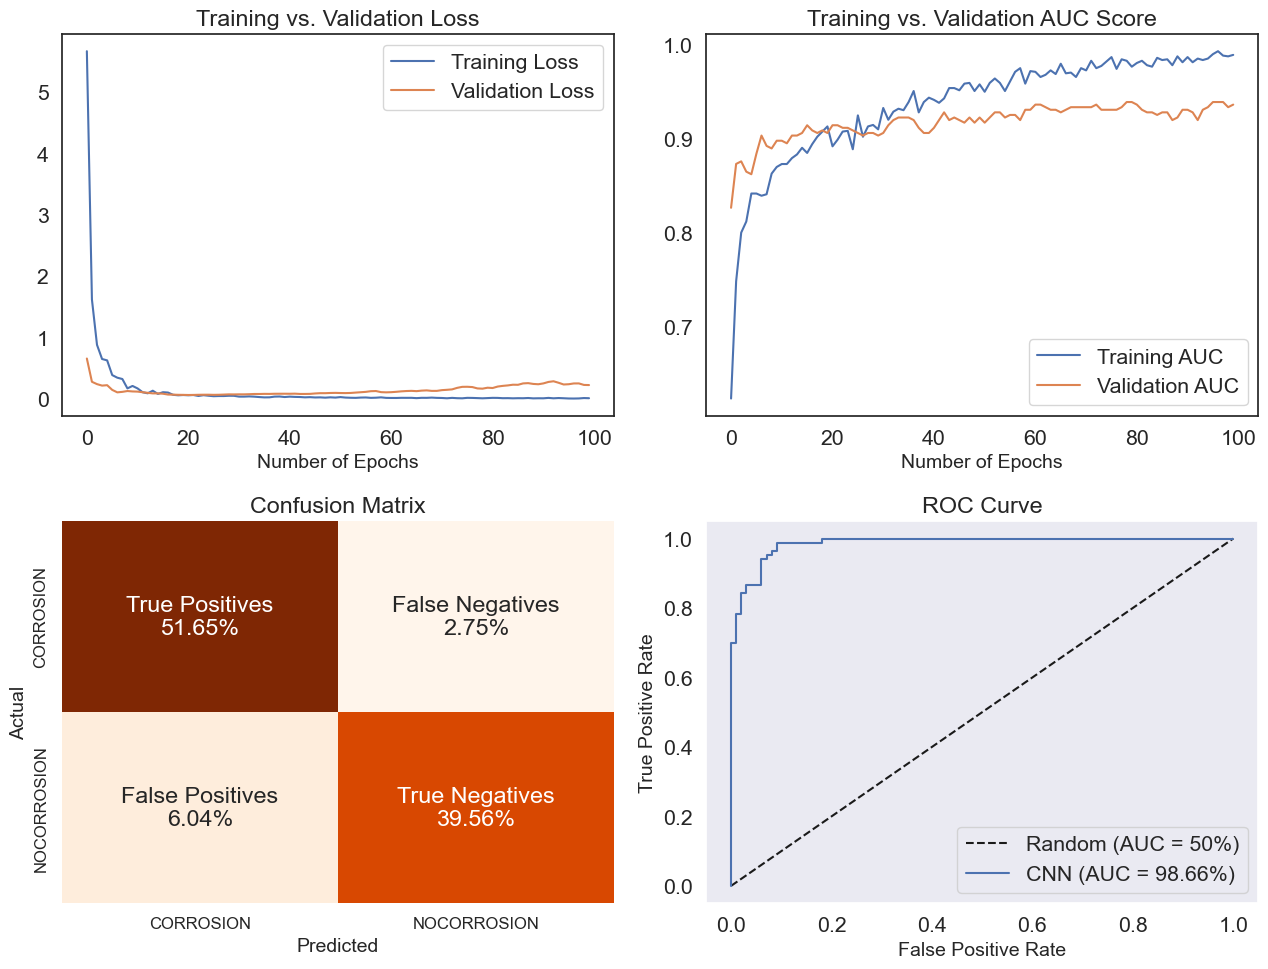

In [53]:
metrics_focal_attention_101 = create_charts(resnet101_model_focal_attention, history_focal_attention_101)

In [54]:
# Get predictions
y_true_focal_attention_101 = test_generator.classes
y_pred_probs_focal_attention_101 = resnet101_model_focal_attention.predict(test_generator)
y_pred_focal_attention_101 = (y_pred_probs_focal_attention_101 > 0.5).astype(int)

# Get class names from generator
class_names_focal_attention_101 = list(test_generator.class_indices.keys())

# Print class-wise metrics
report_focal_attention_101 = classification_report(y_true_focal_attention_101, y_pred_focal_attention_101, target_names=class_names_focal_attention_101, digits=4)
print("📊 [Classification Report]")
print(report_focal_attention_101)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 910ms/step
📊 [Classification Report]
              precision    recall  f1-score   support

   CORROSION     0.8952    0.9495    0.9216        99
 NOCORROSION     0.9351    0.8675    0.9000        83

    accuracy                         0.9121       182
   macro avg     0.9152    0.9085    0.9108       182
weighted avg     0.9134    0.9121    0.9117       182



# ResNet18

In [55]:
import keras_cv_attention_models.resnet_family as resnet_family
print(dir(resnet_family))

[WARNING] Setting TF_USE_LEGACY_KERAS=1. Make sure this is ahead of importing tensorflow or keras.
['RegNetY', 'RegNetY040', 'RegNetY064', 'RegNetY080', 'RegNetY160', 'RegNetY320', 'RegNetZB16', 'RegNetZC16', 'RegNetZC16_EVO', 'RegNetZD32', 'RegNetZD8', 'RegNetZD8_EVO', 'RegNetZE8', 'ResNeXt', 'ResNeXt101', 'ResNeXt101W', 'ResNeXt101W_64', 'ResNeXt50', 'ResNeXt50D', 'ResNet101D', 'ResNet152D', 'ResNet200D', 'ResNet50D', 'ResNet51Q', 'ResNet61Q', 'ResNetD', 'ResNetQ', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__regnety_default_doc__', '__regnety_head_doc__', '__regnetz_default_doc__', '__regnetz_head_doc__', '__resnetd_default_doc__', '__resnetd_head_doc__', '__resnetq_head_doc__', '__resnetq_tail_doc__', '__resnext_default_doc__', '__resnext_head_doc__', '__spec__', '__tail_doc__', 'regnet', 'resnet_deep', 'resnet_quad', 'resnext']


<p>Note: Since ResNet18 is not available in Keras, the PyTorch library is used instead<p>

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torchvision.models import resnet18, ResNet18_Weights

In [57]:
def create_charts_pytorch(model, train_loss, val_loss, test_loader, class_names, device="cpu"):
    plt.style.use('default') 
    model.eval()
    y_true = []
    y_pred = []
    y_pred_prob = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels_np = labels.cpu().numpy()
            outputs = model(images).cpu().numpy().flatten()
            preds = (outputs > 0.5).astype(int)

            y_true.extend(labels_np)
            y_pred.extend(preds)
            y_pred_prob.extend(outputs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_prob = np.array(y_pred_prob)

    fig = plt.figure(figsize=(13, 10))

    # Plot 1: Training vs Validation Loss
    plt.subplot(2, 2, 1)
    plt.plot(train_loss, label="Train Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.title("Training vs. Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot 2: ROC Curve
    plt.subplot(2, 2, 2)
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 50%)")
    plt.plot(fpr, tpr, label=f"Model (AUC = {auc:.2%})")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()

    # Plot 3: Confusion Matrix
    plt.subplot(2, 2, 3)
    cm = confusion_matrix(y_true, y_pred)
    percentages = cm.astype('float') / cm.sum(axis=1, keepdims=True)
    annotations = np.array([
        [f"TN\n{cm[0,0]} ({percentages[0,0]:.2%})", f"FP\n{cm[0,1]} ({percentages[0,1]:.2%})"],
        [f"FN\n{cm[1,0]} ({percentages[1,0]:.2%})", f"TP\n{cm[1,1]} ({percentages[1,1]:.2%})"]
    ])
    sns.heatmap(cm, annot=annotations, fmt="", cmap="Oranges", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Plot 4: Summary Statistics
    plt.subplot(2, 2, 4)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    # Compute specificity manually
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0

    plt.axis("off")
    plt.title("Summary Statistics")
    summary_text = f"Accuracy: {acc:.2%}\nPrecision: {prec:.2%}\nRecall: {rec:.2%}\nSpecificity: {spec:.2%}\nF1 Score: {f1:.2%}"
    plt.text(0.1, 0.5, summary_text, fontsize=12)

    plt.tight_layout()
    plt.show()

    # Return predictions + metrics
    return {
        "y_true": y_true,
        "y_pred": y_pred,
        "y_pred_prob": y_pred_prob,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "specificity": spec,
        "f1_score": f1
    }

<h3>Basic</h3>

In [58]:
# === Settings ===
HEIGHT = 128
WIDTH = 128
BATCH_SIZE = 128
FC_LAYERS = [512, 256]
dropout = 0.5
NUM_EPOCHS = 100
LR = 1e-4
class_list = ['CORROSION', 'NOCORROSION']
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [59]:
transform = transforms.Compose([
    transforms.Resize((HEIGHT, WIDTH)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# === Datasets & Dataloaders ===
train_dataset = ImageFolder('split/train', transform=transform)
val_dataset = ImageFolder('split/validation', transform=transform)
test_dataset = ImageFolder('split/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [60]:
# === Build Model ===
class ResNet18Basic(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = resnet18(weights=ResNet18_Weights.DEFAULT)
        for param in self.backbone.parameters():
            param.requires_grad = False

        self.backbone.fc = nn.Sequential(
            nn.Linear(self.backbone.fc.in_features, FC_LAYERS[0]),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(FC_LAYERS[0], FC_LAYERS[1]),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(FC_LAYERS[1], 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.backbone(x)


resnet18_model_basic  = ResNet18Basic().to(DEVICE)

# === Compile Model ===
criterion = nn.BCELoss()
optimizer = optim.Adam(resnet18_model_basic .parameters(), lr=LR)

# === Train Model ===
history_basic_18 = []
train_loss_list_basic_18 = []
val_loss_list_basic_18 = []

for epoch in range(NUM_EPOCHS):
    # === Train ===
    resnet18_model_basic.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.float().unsqueeze(1).to(DEVICE)

        optimizer.zero_grad()
        outputs = resnet18_model_basic(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

    avg_train_loss = train_loss / len(train_loader.dataset)
    train_loss_list_basic_18.append(avg_train_loss)

    # === Validation ===
    resnet18_model_basic.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(DEVICE)
            labels = labels.float().unsqueeze(1).to(DEVICE)

            outputs = resnet18_model_basic(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    avg_val_loss = val_loss / len(val_loader.dataset)
    val_loss_list_basic_18.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")


# === Model Summary ===
print(resnet18_model_basic )

Epoch 1/100 - Train Loss: 0.6884 | Val Loss: 0.6663
Epoch 2/100 - Train Loss: 0.6588 | Val Loss: 0.6366
Epoch 3/100 - Train Loss: 0.6279 | Val Loss: 0.5937
Epoch 4/100 - Train Loss: 0.5944 | Val Loss: 0.5569
Epoch 5/100 - Train Loss: 0.5492 | Val Loss: 0.5092
Epoch 6/100 - Train Loss: 0.5060 | Val Loss: 0.4588
Epoch 7/100 - Train Loss: 0.4580 | Val Loss: 0.4250
Epoch 8/100 - Train Loss: 0.4242 | Val Loss: 0.3795
Epoch 9/100 - Train Loss: 0.4048 | Val Loss: 0.3726
Epoch 10/100 - Train Loss: 0.3790 | Val Loss: 0.3364
Epoch 11/100 - Train Loss: 0.3571 | Val Loss: 0.3315
Epoch 12/100 - Train Loss: 0.3437 | Val Loss: 0.3040
Epoch 13/100 - Train Loss: 0.3275 | Val Loss: 0.2875
Epoch 14/100 - Train Loss: 0.3253 | Val Loss: 0.3050
Epoch 15/100 - Train Loss: 0.3361 | Val Loss: 0.3113
Epoch 16/100 - Train Loss: 0.3128 | Val Loss: 0.3007
Epoch 17/100 - Train Loss: 0.3149 | Val Loss: 0.2955
Epoch 18/100 - Train Loss: 0.2940 | Val Loss: 0.3081
Epoch 19/100 - Train Loss: 0.2800 | Val Loss: 0.3003
Ep

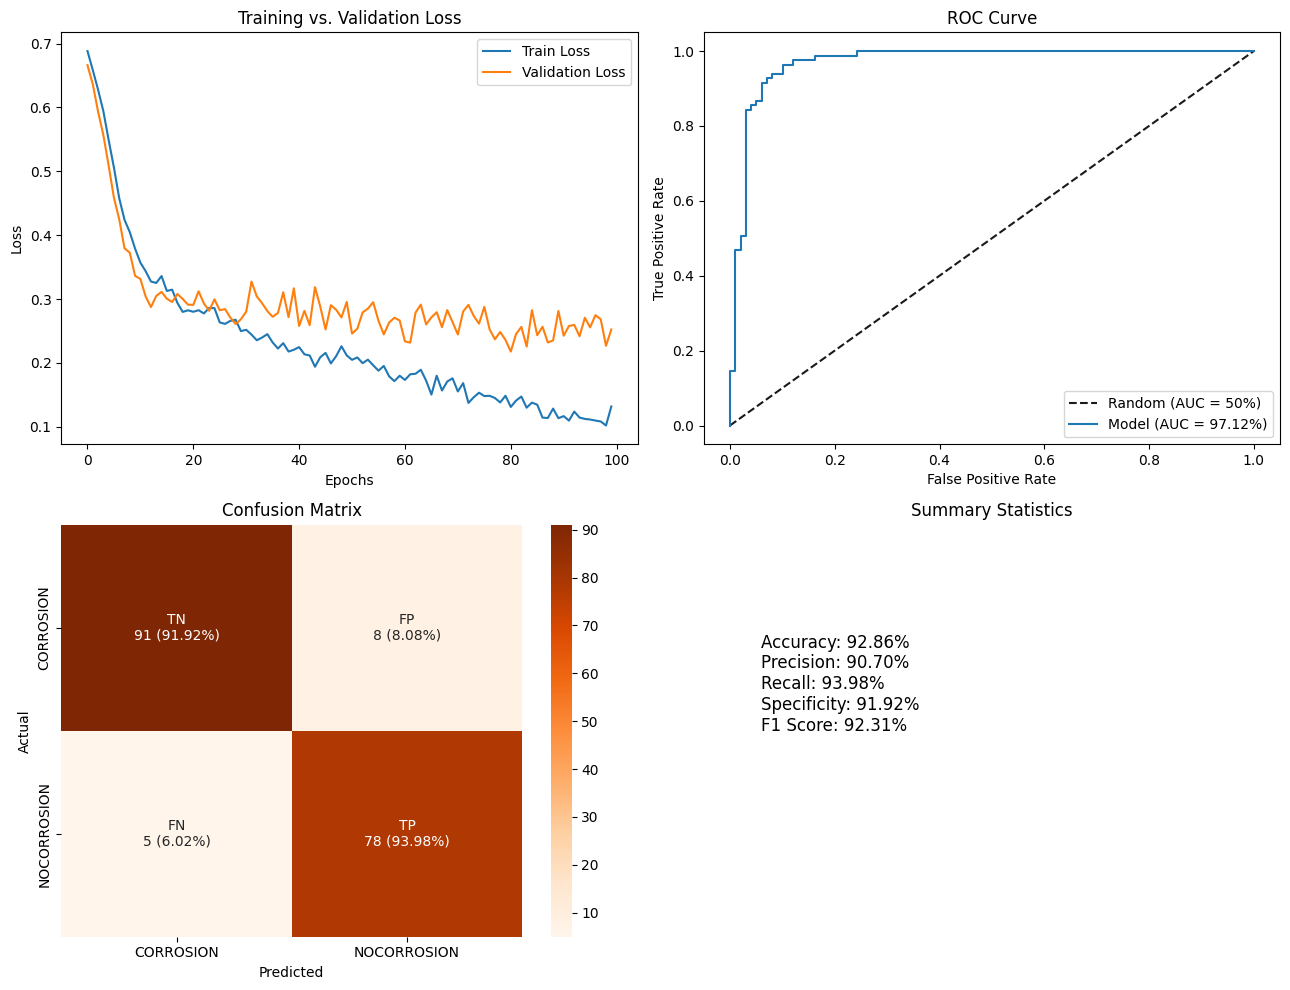

   Accuracy  Precision  Recall  Specificity  F1 Score
0    0.9286      0.907  0.9398       0.9192    0.9231


In [61]:
results_basic_18 = create_charts_pytorch(
    model=resnet18_model_basic,
    train_loss=train_loss_list_basic_18,
    val_loss=val_loss_list_basic_18,
    test_loader=test_loader,
    class_names=['CORROSION', 'NOCORROSION'],
    device=DEVICE
)

# View only the metrics
metrics_df_basic_18 = pd.DataFrame([{
    "Accuracy": results_basic_18["accuracy"],
    "Precision": results_basic_18["precision"],
    "Recall": results_basic_18["recall"],
    "Specificity": results_basic_18["specificity"],
    "F1 Score": results_basic_18["f1_score"]
}])

print(metrics_df_basic_18.round(4))

## Modified Focal Loss

In [62]:
# === Modified Focal Loss (PyTorch Version) ===
class ModifiedFocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.5):
        super(ModifiedFocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.eps = 1e-7

    def forward(self, y_pred, y_true):
        y_pred = torch.clamp(y_pred, self.eps, 1. - self.eps)
        pt = torch.where(y_true == 1, y_pred, 1 - y_pred)
        weight = self.alpha * y_true * ((1 - y_pred) ** self.gamma) + \
                 (1 - self.alpha) * (1 - y_true) * (y_pred ** self.gamma)
        ce = -y_true * torch.log(y_pred) - (1 - y_true) * torch.log(1 - y_pred)
        mod_term = torch.log(1 + 1 / pt)
        return torch.mean(weight * ce * mod_term)

# === Build Model ===
class ResNet18Basic(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = resnet18(weights=ResNet18_Weights.DEFAULT) 
        for param in self.backbone.parameters():
            param.requires_grad = False

        self.backbone.fc = nn.Sequential(
            nn.Linear(self.backbone.fc.in_features, FC_LAYERS[0]),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(FC_LAYERS[0], FC_LAYERS[1]),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(FC_LAYERS[1], 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.backbone(x)

resnet18_model_focal = ResNet18Basic().to(DEVICE)

# === Compile Model with Modified Focal Loss ===
criterion = ModifiedFocalLoss(gamma=2.0, alpha=0.5)
optimizer = optim.Adam(resnet18_model_focal.parameters(), lr=LR)

# === Train Model ===
train_loss_list_focal_18 = []
val_loss_list_focal_18 = []

for epoch in range(NUM_EPOCHS):
    resnet18_model_focal.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.float().unsqueeze(1).to(DEVICE)

        optimizer.zero_grad()
        outputs = resnet18_model_focal(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

    avg_train_loss = train_loss / len(train_loader.dataset)
    train_loss_list_focal_18.append(avg_train_loss)

    # === Validation ===
    resnet18_model_focal.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(DEVICE)
            labels = labels.float().unsqueeze(1).to(DEVICE)

            outputs = resnet18_model_focal(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    avg_val_loss = val_loss / len(val_loader.dataset)
    val_loss_list_focal_18.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

# === Model Summary ===
print(resnet18_model_focal)

Epoch 1/100 - Train Loss: 0.1032 | Val Loss: 0.0857
Epoch 2/100 - Train Loss: 0.0908 | Val Loss: 0.0803
Epoch 3/100 - Train Loss: 0.0848 | Val Loss: 0.0739
Epoch 4/100 - Train Loss: 0.0808 | Val Loss: 0.0699
Epoch 5/100 - Train Loss: 0.0721 | Val Loss: 0.0658
Epoch 6/100 - Train Loss: 0.0690 | Val Loss: 0.0588
Epoch 7/100 - Train Loss: 0.0673 | Val Loss: 0.0564
Epoch 8/100 - Train Loss: 0.0623 | Val Loss: 0.0543
Epoch 9/100 - Train Loss: 0.0626 | Val Loss: 0.0512
Epoch 10/100 - Train Loss: 0.0597 | Val Loss: 0.0510
Epoch 11/100 - Train Loss: 0.0555 | Val Loss: 0.0515
Epoch 12/100 - Train Loss: 0.0554 | Val Loss: 0.0494
Epoch 13/100 - Train Loss: 0.0513 | Val Loss: 0.0461
Epoch 14/100 - Train Loss: 0.0530 | Val Loss: 0.0489
Epoch 15/100 - Train Loss: 0.0524 | Val Loss: 0.0465
Epoch 16/100 - Train Loss: 0.0492 | Val Loss: 0.0490
Epoch 17/100 - Train Loss: 0.0495 | Val Loss: 0.0463
Epoch 18/100 - Train Loss: 0.0491 | Val Loss: 0.0436
Epoch 19/100 - Train Loss: 0.0452 | Val Loss: 0.0460
Ep

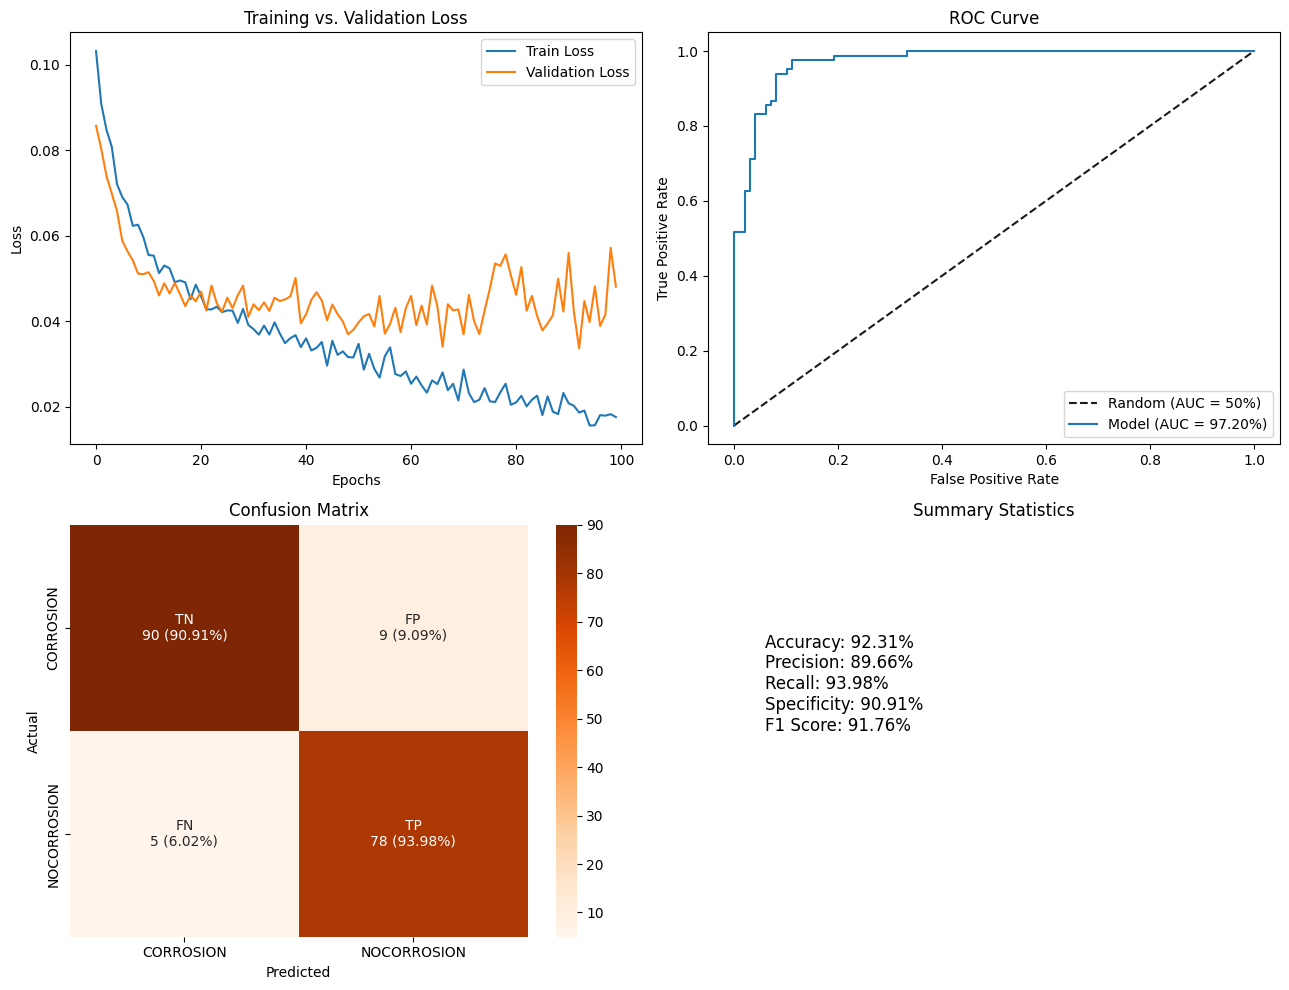

   Accuracy  Precision  Recall  Specificity  F1 Score
0    0.9231     0.8966  0.9398       0.9091    0.9176


In [63]:
results_focal_18 = create_charts_pytorch(
    model=resnet18_model_focal,
    train_loss=train_loss_list_focal_18,
    val_loss=val_loss_list_focal_18,
    test_loader=test_loader,
    class_names=['CORROSION', 'NOCORROSION'],
    device=DEVICE
)

# View only the metrics
metrics_df_focal_18 = pd.DataFrame([{
    "Accuracy": results_focal_18["accuracy"],
    "Precision": results_focal_18["precision"],
    "Recall": results_focal_18["recall"],
    "Specificity": results_focal_18["specificity"],
    "F1 Score": results_focal_18["f1_score"]
}])

print(metrics_df_focal_18.round(4))

## Model with Attention Block

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision.models import ResNet18_Weights

# === Attention Block ===
class AttentionBlock(nn.Module):
    def __init__(self, in_channels, num_heads=4):
        super().__init__()
        self.norm = nn.LayerNorm(in_channels)
        self.attn = nn.MultiheadAttention(embed_dim=in_channels, num_heads=num_heads, batch_first=True)

    def forward(self, x):
        B, C, H, W = x.shape
        x = x.view(B, C, H * W).permute(0, 2, 1)  # [B, HW, C]
        x_norm = self.norm(x)
        attn_out, _ = self.attn(x_norm, x_norm, x_norm)
        x = x + attn_out  # Residual connection
        x = x.permute(0, 2, 1).view(B, C, H, W)
        return x

# === Build Model ===
class ResNet18WithAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        for param in self.backbone.parameters():
            param.requires_grad = False

        self.features = nn.Sequential(*list(self.backbone.children())[:-2])  # [B, 512, 4, 4]
        self.attn = AttentionBlock(in_channels=512, num_heads=4)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, FC_LAYERS[0]),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(FC_LAYERS[0], FC_LAYERS[1]),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(FC_LAYERS[1], 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        x = self.attn(x)
        x = self.pool(x)
        return self.classifier(x)

# === Initialize Model ===
resnet18_model_attn = ResNet18WithAttention().to(DEVICE)

# === Compile Model with Binary Cross-Entropy Loss ===
criterion = nn.BCELoss()
optimizer = optim.Adam(resnet18_model_attn.parameters(), lr=LR)

# === Train Model ===
train_loss_list_attn_18 = []
val_loss_list_attn_18 = []

for epoch in range(NUM_EPOCHS):
    resnet18_model_attn.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.float().unsqueeze(1).to(DEVICE)

        optimizer.zero_grad()
        outputs = resnet18_model_attn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

    avg_train_loss = train_loss / len(train_loader.dataset)
    train_loss_list_attn_18.append(avg_train_loss)

    # === Validation ===
    resnet18_model_attn.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(DEVICE)
            labels = labels.float().unsqueeze(1).to(DEVICE)

            outputs = resnet18_model_attn(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    avg_val_loss = val_loss / len(val_loader.dataset)
    val_loss_list_attn_18.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

# === Model Summary ===
print(resnet18_model_attn)

Epoch 1/100 - Train Loss: 0.6858 | Val Loss: 0.6463
Epoch 2/100 - Train Loss: 0.6430 | Val Loss: 0.6024
Epoch 3/100 - Train Loss: 0.5912 | Val Loss: 0.5333
Epoch 4/100 - Train Loss: 0.5107 | Val Loss: 0.4417
Epoch 5/100 - Train Loss: 0.4349 | Val Loss: 0.3723
Epoch 6/100 - Train Loss: 0.3537 | Val Loss: 0.3307
Epoch 7/100 - Train Loss: 0.2956 | Val Loss: 0.3079
Epoch 8/100 - Train Loss: 0.2822 | Val Loss: 0.2975
Epoch 9/100 - Train Loss: 0.2746 | Val Loss: 0.2756
Epoch 10/100 - Train Loss: 0.2393 | Val Loss: 0.2810
Epoch 11/100 - Train Loss: 0.2372 | Val Loss: 0.2953
Epoch 12/100 - Train Loss: 0.2136 | Val Loss: 0.3168
Epoch 13/100 - Train Loss: 0.1989 | Val Loss: 0.2728
Epoch 14/100 - Train Loss: 0.2308 | Val Loss: 0.2460
Epoch 15/100 - Train Loss: 0.2092 | Val Loss: 0.3011
Epoch 16/100 - Train Loss: 0.1875 | Val Loss: 0.2332
Epoch 17/100 - Train Loss: 0.1893 | Val Loss: 0.2971
Epoch 18/100 - Train Loss: 0.1911 | Val Loss: 0.2943
Epoch 19/100 - Train Loss: 0.1941 | Val Loss: 0.2335
Ep

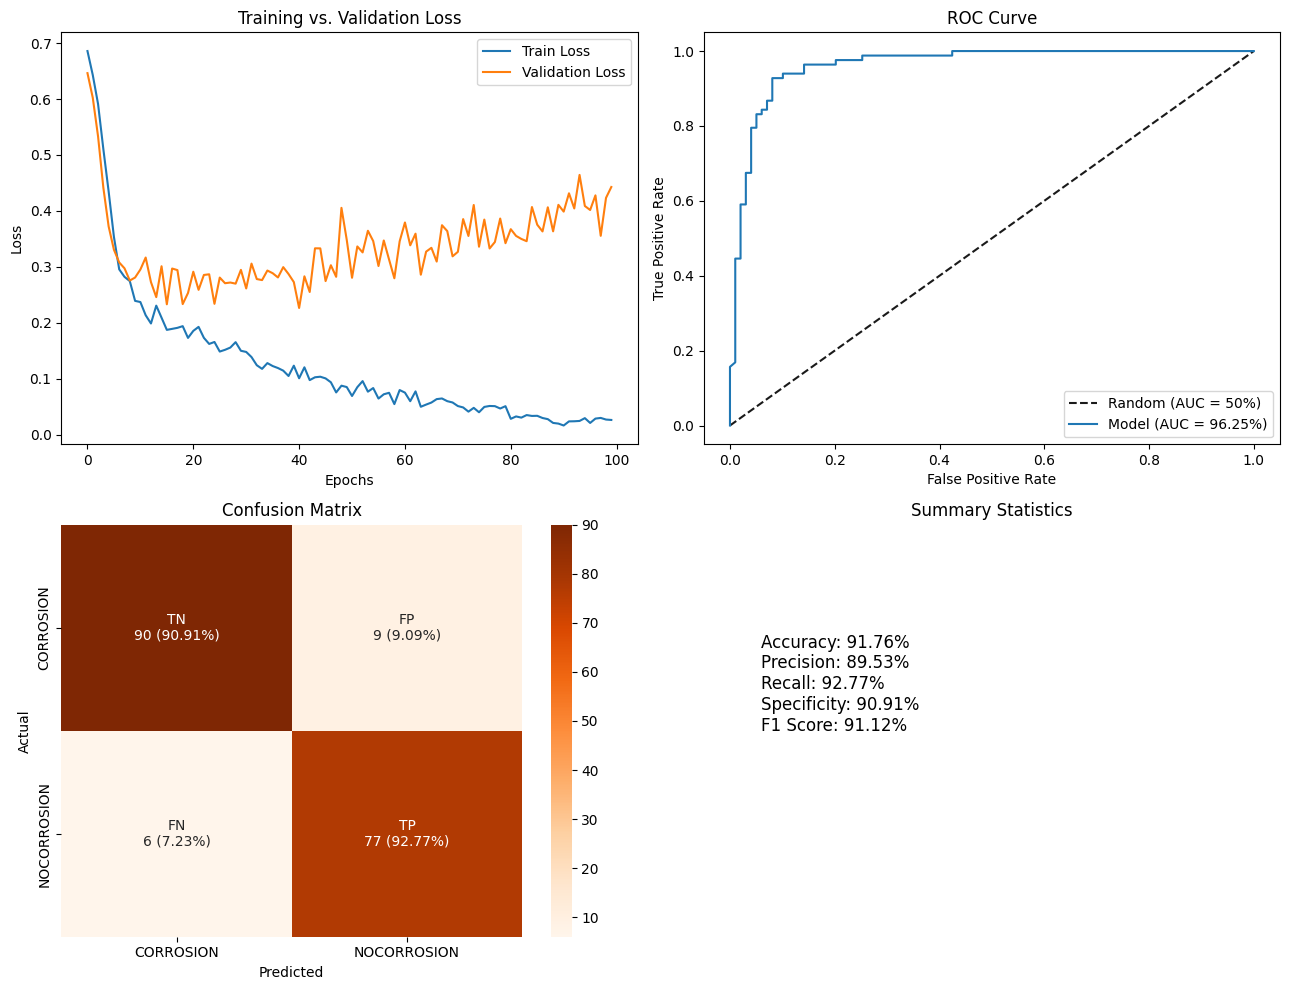

   Accuracy  Precision  Recall  Specificity  F1 Score
0    0.9176     0.8953  0.9277       0.9091    0.9112


In [65]:
results_attn_18 = create_charts_pytorch(
    model=resnet18_model_attn,  
    train_loss=train_loss_list_attn_18,  
    val_loss=val_loss_list_attn_18,
    test_loader=test_loader,
    class_names=['CORROSION', 'NOCORROSION'],
    device=DEVICE
)

# View only the metrics
metrics_df_attn_18 = pd.DataFrame([{
    "Accuracy": results_attn_18["accuracy"],
    "Precision": results_attn_18["precision"],
    "Recall": results_attn_18["recall"],
    "Specificity": results_attn_18["specificity"],
    "F1 Score": results_attn_18["f1_score"]
}])

print(metrics_df_attn_18.round(4))

## Modified Focal Loss + Attention Block

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision.models import ResNet18_Weights

# === Modified Focal Loss (PyTorch Version) ===
class ModifiedFocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.5):
        super(ModifiedFocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.eps = 1e-7

    def forward(self, y_pred, y_true):
        y_pred = torch.clamp(y_pred, self.eps, 1. - self.eps)
        pt = torch.where(y_true == 1, y_pred, 1 - y_pred)
        weight = self.alpha * y_true * ((1 - y_pred) ** self.gamma) + \
                 (1 - self.alpha) * (1 - y_true) * (y_pred ** self.gamma)
        ce = -y_true * torch.log(y_pred) - (1 - y_true) * torch.log(1 - y_pred)
        mod_term = torch.log(1 + 1 / pt)
        return torch.mean(weight * ce * mod_term)

# === Attention Block ===
class AttentionBlock(nn.Module):
    def __init__(self, in_channels, num_heads=4):
        super().__init__()
        self.norm = nn.LayerNorm(in_channels)
        self.attn = nn.MultiheadAttention(embed_dim=in_channels, num_heads=num_heads, batch_first=True)

    def forward(self, x):
        B, C, H, W = x.shape
        x = x.view(B, C, H * W).permute(0, 2, 1)  # [B, HW, C]
        x_norm = self.norm(x)
        attn_out, _ = self.attn(x_norm, x_norm, x_norm)
        x = x + attn_out  # Residual connection
        x = x.permute(0, 2, 1).view(B, C, H, W)
        return x

# === Build Model ===
class ResNet18WithAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        for param in self.backbone.parameters():
            param.requires_grad = False

        self.features = nn.Sequential(*list(self.backbone.children())[:-2])  # [B, 512, 4, 4]
        self.attn = AttentionBlock(in_channels=512, num_heads=4)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, FC_LAYERS[0]),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(FC_LAYERS[0], FC_LAYERS[1]),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(FC_LAYERS[1], 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        x = self.attn(x)
        x = self.pool(x)
        return self.classifier(x)

# === Initialize Model ===
resnet18_model_focal_attn = ResNet18WithAttention().to(DEVICE)

# === Compile Model with Modified Focal Loss ===
criterion = ModifiedFocalLoss(gamma=2.0, alpha=0.5)
optimizer = optim.Adam(resnet18_model_focal_attn.parameters(), lr=LR)

# === Train Model ===
train_loss_list_focal_attn_18 = []
val_loss_list_focal_attn_18 = []

for epoch in range(NUM_EPOCHS):
    resnet18_model_focal_attn.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.float().unsqueeze(1).to(DEVICE)

        optimizer.zero_grad()
        outputs = resnet18_model_focal_attn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

    avg_train_loss = train_loss / len(train_loader.dataset)
    train_loss_list_focal_attn_18.append(avg_train_loss)

    # === Validation ===
    resnet18_model_focal_attn.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(DEVICE)
            labels = labels.float().unsqueeze(1).to(DEVICE)

            outputs = resnet18_model_focal_attn(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    avg_val_loss = val_loss / len(val_loader.dataset)
    val_loss_list_focal_attn_18.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

# === Model Summary ===
print(resnet18_model_focal_attn)

Epoch 1/100 - Train Loss: 0.0984 | Val Loss: 0.0808
Epoch 2/100 - Train Loss: 0.0845 | Val Loss: 0.0720
Epoch 3/100 - Train Loss: 0.0763 | Val Loss: 0.0642
Epoch 4/100 - Train Loss: 0.0667 | Val Loss: 0.0541
Epoch 5/100 - Train Loss: 0.0590 | Val Loss: 0.0493
Epoch 6/100 - Train Loss: 0.0536 | Val Loss: 0.0465
Epoch 7/100 - Train Loss: 0.0492 | Val Loss: 0.0453
Epoch 8/100 - Train Loss: 0.0479 | Val Loss: 0.0449
Epoch 9/100 - Train Loss: 0.0421 | Val Loss: 0.0410
Epoch 10/100 - Train Loss: 0.0405 | Val Loss: 0.0467
Epoch 11/100 - Train Loss: 0.0395 | Val Loss: 0.0405
Epoch 12/100 - Train Loss: 0.0380 | Val Loss: 0.0410
Epoch 13/100 - Train Loss: 0.0336 | Val Loss: 0.0427
Epoch 14/100 - Train Loss: 0.0330 | Val Loss: 0.0427
Epoch 15/100 - Train Loss: 0.0323 | Val Loss: 0.0489
Epoch 16/100 - Train Loss: 0.0319 | Val Loss: 0.0445
Epoch 17/100 - Train Loss: 0.0326 | Val Loss: 0.0414
Epoch 18/100 - Train Loss: 0.0302 | Val Loss: 0.0410
Epoch 19/100 - Train Loss: 0.0315 | Val Loss: 0.0426
Ep

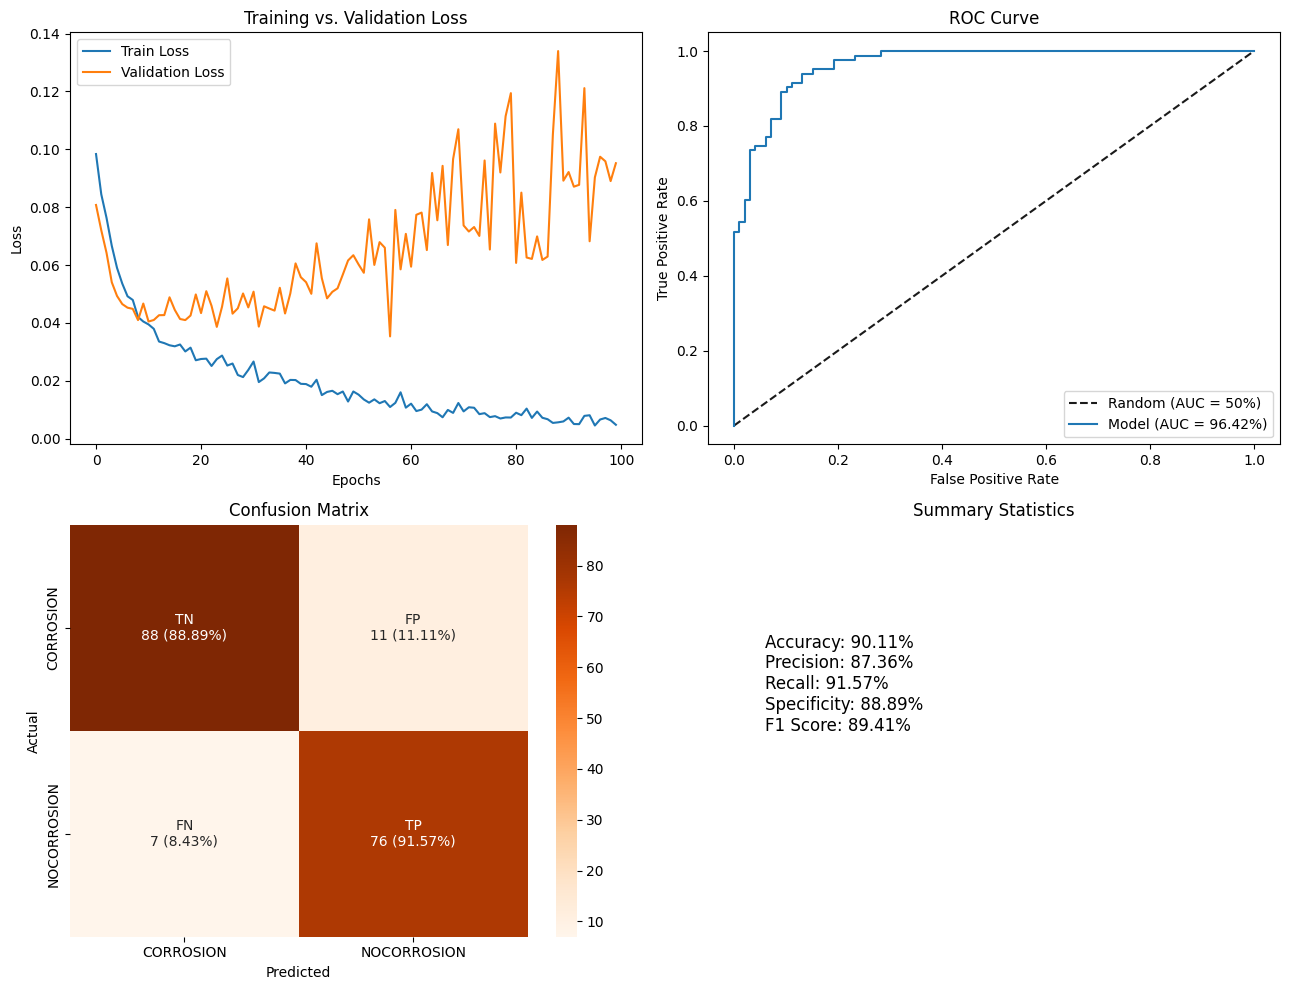

   Accuracy  Precision  Recall  Specificity  F1 Score
0    0.9011     0.8736  0.9157       0.8889    0.8941


In [67]:
results_focal_attn_18 = create_charts_pytorch(
    model=resnet18_model_focal_attn,
    train_loss=train_loss_list_focal_attn_18,
    val_loss=val_loss_list_focal_attn_18,
    test_loader=test_loader,
    class_names=['CORROSION', 'NOCORROSION'],
    device=DEVICE
)

# View only the metrics
metrics_df_focal_attn_18 = pd.DataFrame([{
    "Accuracy": results_focal_attn_18["accuracy"],
    "Precision": results_focal_attn_18["precision"],
    "Recall": results_focal_attn_18["recall"],
    "Specificity": results_focal_attn_18["specificity"],
    "F1 Score": results_focal_attn_18["f1_score"]
}])

print(metrics_df_focal_attn_18.round(4))

# Step 5: Evaluate

## Training vs. Validation Loss Visualization 

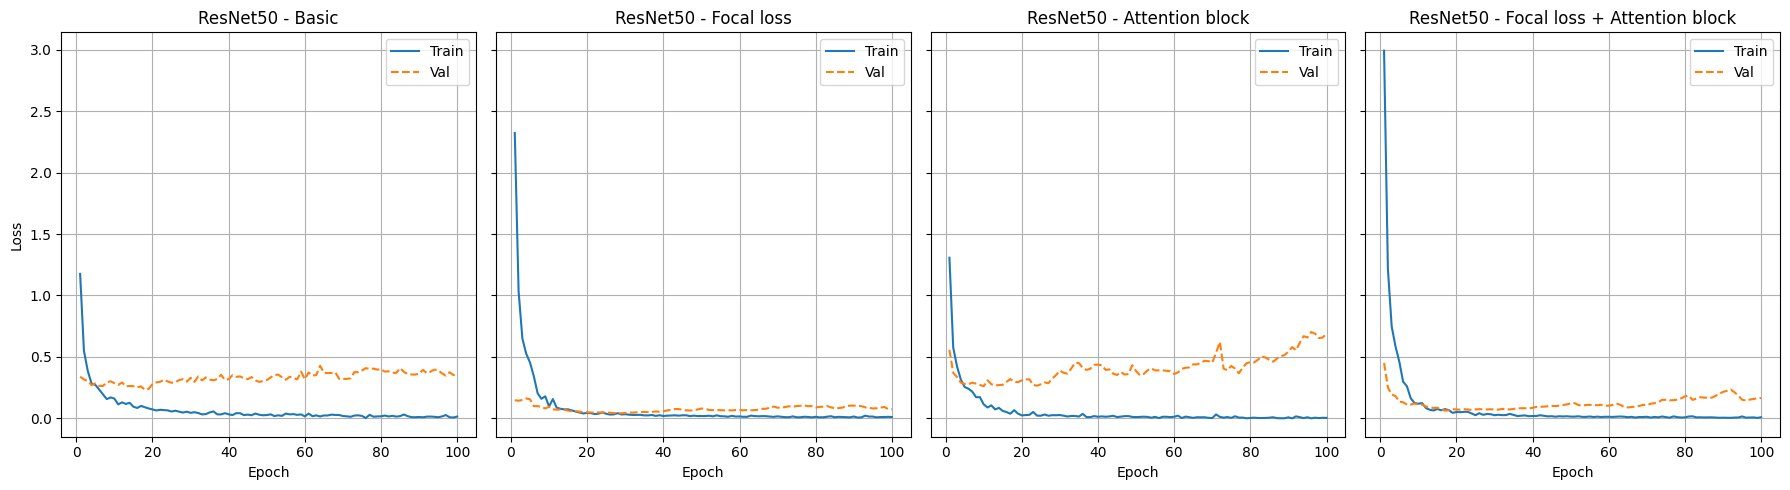

In [84]:
# Extract losses
train_loss_basic = history_basic_50.history['loss']
val_loss_basic = history_basic_50.history['val_loss']

train_loss_focal = history_focal_edit_50.history['loss']
val_loss_focal = history_focal_edit_50.history['val_loss']

train_attn = history_attention_50.history['loss']
val_attn = history_attention_50.history['val_loss']

train_loss_attn = history_focal_attention_50.history['loss']
val_loss_attn = history_focal_attention_50.history['val_loss']

epochs = range(1, len(train_loss_basic) + 1)

# Set up 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

# Basic
axs[0].plot(epochs, train_loss_basic, label='Train')
axs[0].plot(epochs, val_loss_basic, linestyle='--', label='Val')
axs[0].set_title('ResNet50 - Basic')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Focal
axs[1].plot(epochs, train_loss_focal, label='Train')
axs[1].plot(epochs, val_loss_focal, linestyle='--', label='Val')
axs[1].set_title('ResNet50 - Focal loss')
axs[1].set_xlabel('Epoch')
axs[1].legend()
axs[1].grid(True)

# Attention
axs[2].plot(epochs, train_attn, label='Train')
axs[2].plot(epochs, val_attn, linestyle='--', label='Val')
axs[2].set_title('ResNet50 - Attention block')
axs[2].set_xlabel('Epoch')
axs[2].legend()
axs[2].grid(True)

# Focal + Attention
axs[3].plot(epochs, train_loss_attn, label='Train')
axs[3].plot(epochs, val_loss_attn, linestyle='--', label='Val')
axs[3].set_title('ResNet50 - Focal loss + Attention block')
axs[3].set_xlabel('Epoch')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()

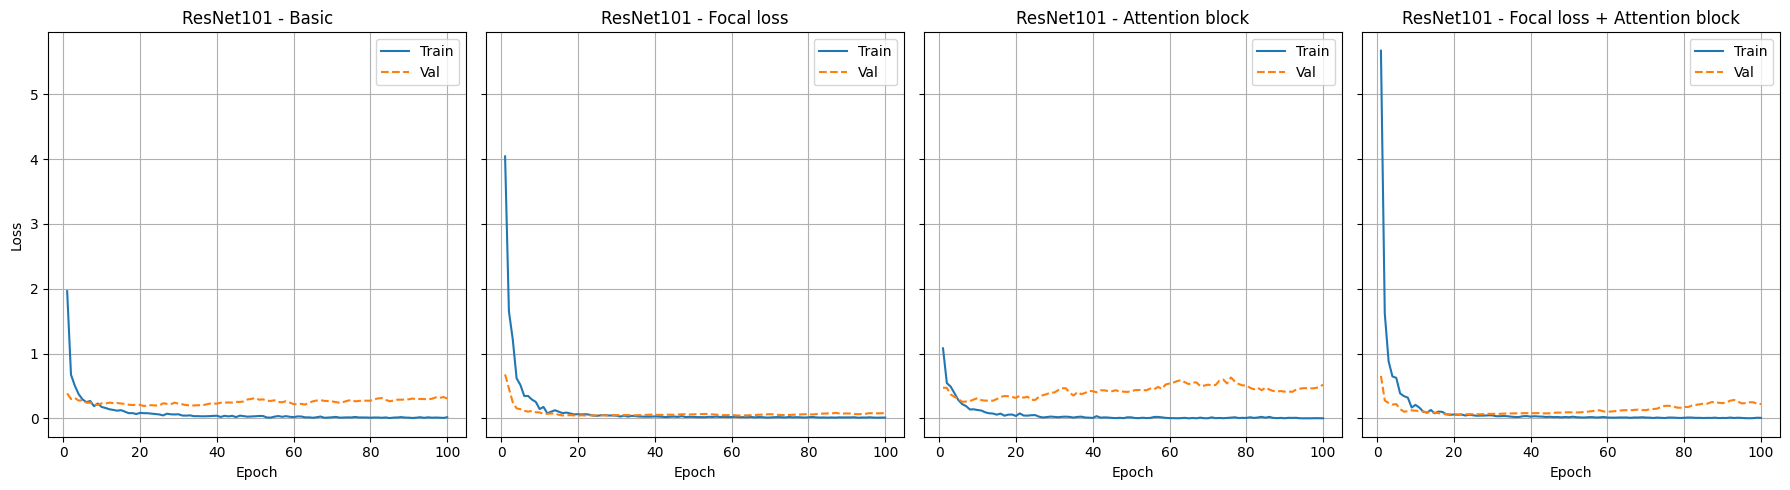

In [85]:
import matplotlib.pyplot as plt

# Extract losses from history objects
train_loss_basic = history_basic_101.history['loss']
val_loss_basic = history_basic_101.history['val_loss']

train_loss_focal = history_focal_edit_101.history['loss']
val_loss_focal = history_focal_edit_101.history['val_loss']

train_attn = history_attention_101.history['loss']
val_attn = history_attention_101.history['val_loss']

train_loss_attn = history_focal_attention_101.history['loss']
val_loss_attn = history_focal_attention_101.history['val_loss']

epochs = range(1, len(train_loss_basic) + 1)

# Set up subplots for side-by-side display
fig, axs = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

# Basic
axs[0].plot(epochs, train_loss_basic, label='Train')
axs[0].plot(epochs, val_loss_basic, linestyle='--', label='Val')
axs[0].set_title('ResNet101 - Basic')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Focal
axs[1].plot(epochs, train_loss_focal, label='Train')
axs[1].plot(epochs, val_loss_focal, linestyle='--', label='Val')
axs[1].set_title('ResNet101 - Focal loss')
axs[1].set_xlabel('Epoch')
axs[1].legend()
axs[1].grid(True)

# Attention
axs[2].plot(epochs, train_attn, label='Train')
axs[2].plot(epochs, val_attn, linestyle='--', label='Val')
axs[2].set_title('ResNet101 - Attention block')
axs[2].set_xlabel('Epoch')
axs[2].legend()
axs[2].grid(True)

# Focal + Attention
axs[3].plot(epochs, train_loss_attn, label='Train')
axs[3].plot(epochs, val_loss_attn, linestyle='--', label='Val')
axs[3].set_title('ResNet101 - Focal loss + Attention block')
axs[3].set_xlabel('Epoch')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()


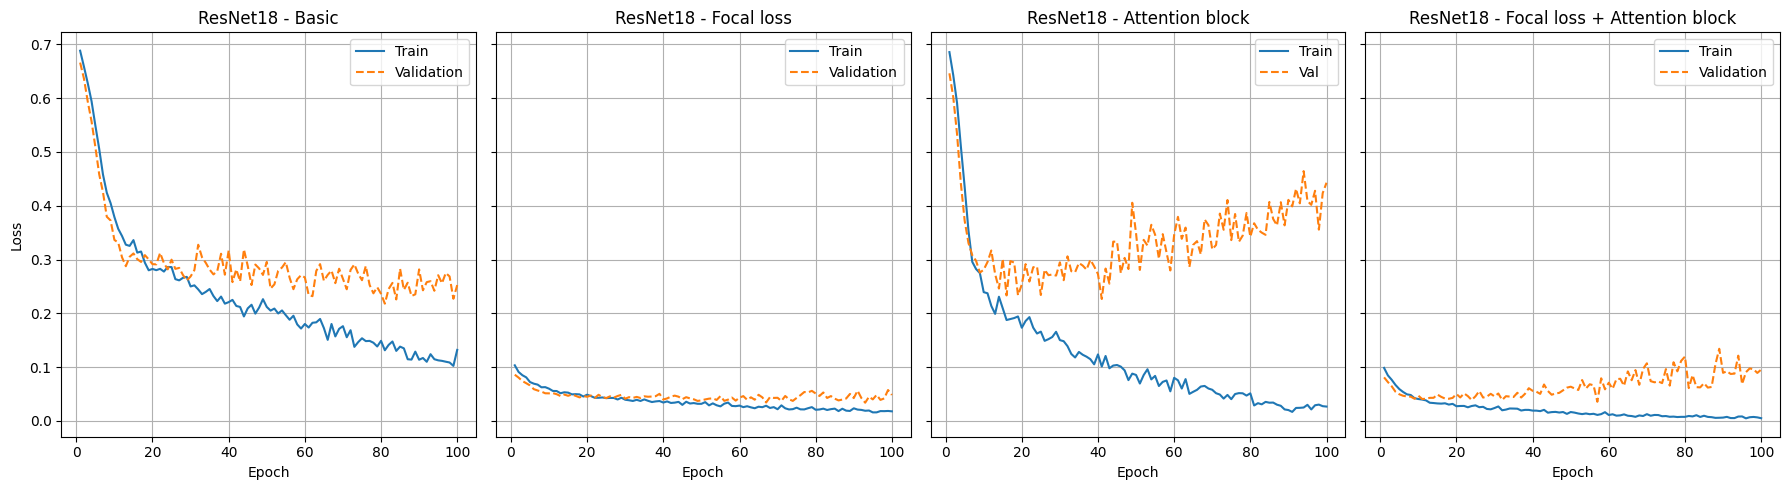

In [86]:
import matplotlib.pyplot as plt

train_loss_basic = train_loss_list_basic_18
val_loss_basic   = val_loss_list_basic_18

train_loss_focal = train_loss_list_focal_18
val_loss_focal   = val_loss_list_focal_18

train_attn = train_loss_list_attn_18
val_attn = val_loss_list_attn_18

train_loss_attn  = train_loss_list_focal_attn_18
val_loss_attn    = val_loss_list_focal_attn_18

epochs = range(1, len(train_loss_basic) + 1)

# === Plot curves ===
fig, axs = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

# ResNet18 - Basic
axs[0].plot(epochs, train_loss_basic, label='Train')
axs[0].plot(epochs, val_loss_basic, linestyle='--', label='Validation')
axs[0].set_title('ResNet18 - Basic')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# ResNet18 - Focal
axs[1].plot(epochs, train_loss_focal, label='Train')
axs[1].plot(epochs, val_loss_focal, linestyle='--', label='Validation')
axs[1].set_title('ResNet18 - Focal loss')
axs[1].set_xlabel('Epoch')
axs[1].legend()
axs[1].grid(True)

# Attention
axs[2].plot(epochs, train_attn, label='Train')
axs[2].plot(epochs, val_attn, linestyle='--', label='Val')
axs[2].set_title('ResNet18 - Attention block')
axs[2].set_xlabel('Epoch')
axs[2].legend()
axs[2].grid(True)

# ResNet18 - Focal + Attention
axs[3].plot(epochs, train_loss_attn, label='Train')
axs[3].plot(epochs, val_loss_attn, linestyle='--', label='Validation')
axs[3].set_title('ResNet18 - Focal loss + Attention block')
axs[3].set_xlabel('Epoch')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()

## Evaluation Metrics Summary Table

In [71]:
# === Step 1: ResNet50 ===
metrics_data_50 = [
    {"Model": "ResNet50 - Basic", **metrics_basic_50},
    {"Model": "ResNet50 - Focal", **metrics_focal_50},
    {"Model": "ResNet50 - Attention", **metrics_attention_50},
    {"Model": "ResNet50 - Focal + Attention", **metrics_focal_attention_50},
]
metrics_df_50 = pd.DataFrame(metrics_data_50)

# Fix lowercase keys if present
metrics_df_50.rename(columns={
    "accuracy": "Accuracy",
    "precision": "Precision",
    "recall": "Recall",
    "specificity": "Specificity",
    "f1_score": "F1 Score"
}, inplace=True)


# === Step 2: ResNet101 ===
metrics_data_101 = [
    {"Model": "ResNet101 - Basic", **metrics_basic_101},
    {"Model": "ResNet101 - Focal", **metrics_focal_101},
    {"Model": "ResNet101 - Attention", **metrics_attention_101},
    {"Model": "ResNet101 - Focal + Attention", **metrics_focal_attention_101},
]
metrics_df_101 = pd.DataFrame(metrics_data_101)

# Fix lowercase keys if present
metrics_df_101.rename(columns={
    "accuracy": "Accuracy",
    "precision": "Precision",
    "recall": "Recall",
    "specificity": "Specificity",
    "f1_score": "F1 Score"
}, inplace=True)


In [72]:
# === Step 3: ResNet18 (from create_charts_pytorch)
metrics_data_18 = [
    {"Model": "ResNet18 - Basic", **results_basic_18},
    {"Model": "ResNet18 - Focal", **results_focal_18},
    {"Model": "ResNet18 - Attention", **results_attn_18},
    {"Model": "ResNet18 - Focal + Attention", **results_focal_attn_18},
]
metrics_df_18 = pd.DataFrame(metrics_data_18)

# Remove prediction arrays
metrics_df_18.drop(columns=["y_true", "y_pred", "y_pred_prob"], inplace=True)

# Rename keys to match others
metrics_df_18.rename(columns={
    "accuracy": "Accuracy",
    "precision": "Precision",
    "recall": "Recall",
    "specificity": "Specificity",
    "f1_score": "F1 Score"
}, inplace=True)

In [73]:
# === Step 4: Combine and show
combined_df = pd.concat([metrics_df_50, metrics_df_101, metrics_df_18], ignore_index=True)
combined_df = combined_df[["Model", "Accuracy", "Precision", "Recall", "Specificity", "F1 Score"]]

print("\n📋 Combined ResNet Model Metrics Table:")
combined_df.round(4)


📋 Combined ResNet Model Metrics Table:


Model  Accuracy  Precision  Recall  Specificity  \
0                ResNet50 - Basic    0.9451     0.9495  0.9495       0.9398   
1                ResNet50 - Focal    0.9451     0.9406  0.9596       0.9277   
2            ResNet50 - Attention    0.9505     0.9787  0.9293       0.9759   
3    ResNet50 - Focal + Attention    0.9560     0.9789  0.9394       0.9759   
4               ResNet101 - Basic    0.9451     0.9406  0.9596       0.9277   
5               ResNet101 - Focal    0.9231     0.9048  0.9596       0.8795   
6           ResNet101 - Attention    0.9341     0.9394  0.9394       0.9277   
7   ResNet101 - Focal + Attention    0.9121     0.8952  0.9495       0.8675   
8                ResNet18 - Basic    0.9286     0.9070  0.9398       0.9192   
9                ResNet18 - Focal    0.9231     0.8966  0.9398       0.9091   
10           ResNet18 - Attention    0.9176     0.8953  0.9277       0.9091   
11   ResNet18 - Focal + Attention    0.9011     0.8736  0.9157       0.8889   

    F1 Score  
0     0.9495  
1     0.9500  
2     0.9534  
3     0.9588  
4     0.9500  
5     0.9314  
6     0.9394  
7     0.9216  
8     0.9231  
9     0.9176  
10    0.9112  
11    0.8941

In [89]:
# Combine all metrics into one DataFrame
combined_df = pd.concat([metrics_df_50, metrics_df_101, metrics_df_18], ignore_index=True)

# Select only the Model and Accuracy columns
accuracy_only_df = combined_df[["Model", "Accuracy"]]

# Display rounded Accuracy table
accuracy_only_df.round(4)

Model  Accuracy
0                ResNet50 - Basic    0.9451
1                ResNet50 - Focal    0.9451
2            ResNet50 - Attention    0.9505
3    ResNet50 - Focal + Attention    0.9560
4               ResNet101 - Basic    0.9451
5               ResNet101 - Focal    0.9231
6           ResNet101 - Attention    0.9341
7   ResNet101 - Focal + Attention    0.9121
8                ResNet18 - Basic    0.9286
9                ResNet18 - Focal    0.9231
10           ResNet18 - Attention    0.9176
11   ResNet18 - Focal + Attention    0.9011

In [91]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [92]:
# Save accuracy to Excel
accuracy_only_df.to_excel("resnet_accuracy_summary.xlsx", index=False)